In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.pyplot import rc_context
import os
import seaborn as sns
import harmonypy as hm
import importlib
import re

In [2]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white', dpi_save=600)

scanpy==1.8.2 anndata==0.7.5 umap==0.5.2 numpy==1.20.3 scipy==1.5.3 pandas==1.3.5 scikit-learn==1.0.1 statsmodels==0.12.2 python-igraph==0.9.8 pynndescent==0.5.5


# Load data

In [4]:
os.chdir('../../../..')

In [5]:
pwd

'/Users/tzuchiao/ProjectAnalysis/AFCA'

In [6]:
fcaDatasetFolder='../FCA/dataset'
fcaH5adFolder='../FCA/dataset/h5ad'
fcaLoomFolder='../FCA/dataset/loom'

In [7]:
harmonyAnalysisFolder=f'Analysis/4.harmony'

In [8]:
# headDataFolder=f'{harmonyAnalysisFolder}/withFCA_head_v0.5_5mad_scrublet'
# os.makedirs(headDataFolder, exist_ok=True)

In [8]:
leiden_L=['leiden_%.1f' % x for x in list(np.arange(1.0, 11.0, 1.0)) + list(np.arange(20.0, 60.0, 10.0)) ]

In [9]:
age_L=['1-5', '30', '50', '70']

In [10]:
allHeadBodyDataFolder=f'{harmonyAnalysisFolder}/afcaFca_headBody_v0.7/normalizedCounts'
os.makedirs(allHeadBodyDataFolder, exist_ok=True)
allHeadBodyPicFolder=f'{allHeadBodyDataFolder}/pic'
os.makedirs(allHeadBodyPicFolder, exist_ok=True)

In [11]:
figureDataFolder=f'Analysis/Figure'
# figureDataFolder=f'Analysis/Figure_github'
os.makedirs(figureDataFolder, exist_ok=True)
figure1Folder=f'{figureDataFolder}/Figure1'
os.makedirs(figure1Folder, exist_ok=True)
figure1PicFolder=f'{figure1Folder}/pic'
os.makedirs(figure1PicFolder, exist_ok=True)

In [12]:
markerFolder=f'{figure1Folder}/marker'
os.makedirs(markerFolder, exist_ok=True)

# Figure 1B: summarize cell numbers obtained from each age

### Stringent version

In [13]:
adata_head_5mad=sc.read(f'{allHeadBodyDataFolder}/afcaFca_head_v0.7_stringent.h5ad')
adata_body_5mad=sc.read(f'{allHeadBodyDataFolder}/afcaFca_body_v0.7_stringent.h5ad')

In [14]:
adata_body_5mad.obs.groupby(['sex', 'age']).count()

cellBC  sampleGroup  tissue  sampleN  n_genes  n_genes_by_counts  \
sex    age                                                                     
female 5     59009        59009   59009        0        0              59009   
       30    29404        29404   29404    29404    29404              29404   
       50    21757        21757   21757    21757    21757              21757   
       70    37879        37879   37879    37879    37879              37879   
male   5     33240        33240   33240        0        0              33240   
       30    55092        55092   55092    55092    55092              55092   
       50    23463        23463   23463    23463    23463              23463   
       70    12084        12084   12084    12084    12084              12084   
mix    5      4345         4345    4345        0        0               4345   
       30        0            0       0        0        0                  0   
       50        0            0       0        0        0                  0   
       70        0            0       0        0        0                  0   

            total_counts  total_counts_mt  pct_counts_mt  total_counts_rRNA  \
sex    age                                                                    
female 5           59009            59009          59009              59009   
       30          29404            29404          29404              29404   
       50          21757            21757          21757              21757   
       70          37879            37879          37879              37879   
male   5           33240            33240          33240              33240   
       30          55092            55092          55092              55092   
       50          23463            23463          23463              23463   
       70          12084            12084          12084              12084   
mix    5            4345             4345           4345               4345   
       30              0                0              0                  0   
       50              0                0              0                  0   
       70              0                0              0                  0   

            ...  leiden_10.0  leiden_20.0  leiden_30.0  leiden_40.0  \
sex    age  ...                                                       
female 5    ...        59009        59009        59009        59009   
       30   ...        29404        29404        29404        29404   
       50   ...        21757        21757        21757        21757   
       70   ...        37879        37879        37879        37879   
male   5    ...        33240        33240        33240        33240   
       30   ...        55092        55092        55092        55092   
       50   ...        23463        23463        23463        23463   
       70   ...        12084        12084        12084        12084   
mix    5    ...         4345         4345         4345         4345   
       30   ...            0            0            0            0   
       50   ...            0            0            0            0   
       70   ...            0            0            0            0   

            leiden_50.0  sex_age   true  linearR_annotation  afca_annotation  \
sex    age                                                                     
female 5          59009    59009  59009               59009            59009   
       30         29404    29404  29404               29404            29404   
       50         21757    21757  21757               21757            21757   
       70         37879    37879  37879               37879            37879   
male   5          33240    33240  33240               33240            33240   
       30         55092    55092  55092               55092            55092   
       50         23463    23463  23463               23463            23463   
       70         12084    12084  12084               12084          

In [15]:
count_Df=adata_body_5mad.obs.groupby(['sex', 'age']).count()
for sex in ['female', 'male', 'mix']:
    print(sex)
    print(count_Df.loc[sex].tissue)

female
age
5     59009
30    29404
50    21757
70    37879
Name: tissue, dtype: int64
male
age
5     33240
30    55092
50    23463
70    12084
Name: tissue, dtype: int64
mix
age
5     4345
30       0
50       0
70       0
Name: tissue, dtype: int64


In [16]:
count_Df=adata_head_5mad.obs.groupby(['sex', 'age']).count()
for sex in ['female', 'male', 'mix']:
    print(sex)
    print(count_Df.loc[sex].tissue)

female
age
5     49011
30    36318
50    24715
70    35413
Name: tissue, dtype: int64
male
age
5     47293
30    25490
50    48860
70    18874
Name: tissue, dtype: int64
mix
age
5     4007
30       0
50       0
70       0
Name: tissue, dtype: int64


# Fig 1C: age pattern

In [17]:
adata_head_5mad=sc.read(f'{allHeadBodyDataFolder}/afcaFca_head_v0.7_stringent.h5ad')
adata_body_5mad=sc.read(f'{allHeadBodyDataFolder}/afcaFca_body_v0.7_stringent.h5ad')

In [18]:
with rc_context({'figure.figsize': (6, 6)}):
    for age in ['5', '30', '50', '70']:
        sc.pl.tsne(adata_body_5mad, color='age', groups=age, size=2, na_in_legend=False, title=f'{age}d', legend_loc=None, save=f'_body_{age}d.pdf', show=False)
        sc.pl.tsne(adata_head_5mad, color='age', groups=age, size=2, na_in_legend=False, title=f'{age}d', legend_loc=None, save=f'_head_{age}d.pdf', show=False)
    
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{figure1PicFolder}/{x}')

# Figur 1D: broad annotations

## Combine all fca/afca head/body/tissues

### identify marker genes

In [40]:
adata_5mad=sc.read(f'{allHeadBodyDataFolder}/afcaFca_headBody_v0.5_stringent.h5ad')

In [17]:
### FCA data
fcaTissue_adata_L=[]

allCelln_Df=pd.DataFrame(columns=['tissue', 'annotation', 'cellN'])

for loomFile in sorted(glob(f'{fcaLoomFolder}/*.loom')): # merge data separately [8:]
    ### tissue-specific folder
    fileName=loomFile.split('/')[-1].split('.')[0]
    tissue=fileName.split('biohub_')[-1][:-4]
    # tissueDataFolder=f'{harmonyAnalysisFolder}/AFCA-FCA_{tissue}'
    # os.makedirs(tissueDataFolder, exist_ok=True)
    # print(fileName)
    # print(tissue)
    
    if tissue not in ['all_wo_blood', 'head', 'body']:
        print(tissue)
        
        # read fca data
        adata=sc.read_loom(loomFile, validate=False)
        # adata=sc.read(loomFile)
        adata.var['gene_ids'] = adata.var.index
        adata.obs['dataset']='FCA'
        
        adata=adata[adata.obs.annotation != 'artefact']
        
        # append adata
        annotationColumnL= ['age', 'dataset', 'fca_id', 'sex', 'tissue'] + [
            x for x in adata.obs.columns.to_list() if 'annotation' in x]
        fcaTissue_adata_L.append( sc.AnnData(X=adata.X, 
                                       obs=adata.obs[annotationColumnL], 
                                       var=adata.var[['gene_ids']]) )

# All data
print('Output all data')
adata_All=fcaTissue_adata_L[0].concatenate(fcaTissue_adata_L[1:], join='outer')  
adata_All.write(f'{figure1Folder}/0.concatenateData_adata_fcaTissues.h5ad') 

# allCelln_Df.to_csv(f'{cellnFolder}/allCellN.csv')

testis
antenna
body_wall
fat_body
gut
haltere
heart
leg
male_reproductive_glands
malpighian_tubule
oenocyte
ovary
proboscis_and_maxillary_palps
trachea
wing
Output all data


... storing 'dataset' as categorical
... storing 'fca_id' as categorical
... storing 'sex' as categorical
... storing 'tissue' as categorical
... storing 'S_annotation' as categorical
... storing 'S_annotation__ontology_id' as categorical
... storing 'S_annotation_broad' as categorical
... storing 'S_annotation_broad__ontology_id' as categorical
... storing 'S_annotation_broad_extrapolated' as categorical
... storing 'S_annotation_broad_extrapolated__ontology_id' as categorical
... storing 'annotation' as categorical
... storing 'annotation__ontology_id' as categorical
... storing 'annotation_broad' as categorical
... storing 'annotation_broad__ontology_id' as categorical
... storing 'R_annotation' as categorical
... storing 'R_annotation__ontology_id' as categorical
... storing 'R_annotation_broad' as categorical
... storing 'R_annotation_broad__ontology_id' as categorical
... storing 'annotation_broad_extrapolated' as categorical
... storing 'annotation_broad_extrapolated__ontology_i

### count cellN

In [43]:
adata_All=sc.read(f'{figure1Folder}/0.concatenateData_adata_fcaTissues.h5ad') 

In [48]:
newAge_L=[]
for i, c in enumerate(adata_All.obs_names):
    age=adata_All.obs.age[i]
    
    if int(age) <= 5:
        newAge_L.append('1-5')
    else:
        newAge_L.append(age)

In [49]:
adata_All.obs['ageGroup']=pd.Categorical(newAge_L)

In [50]:
adata_tissue=adata_All[~adata_All.obs.tissue.isin(['head', 'body'])]

/Users/tzuchiao/opt/anaconda3/envs/scanpy/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [51]:
adata_tissue.obs.ageGroup.value_counts()

1-5    301955
Name: ageGroup, dtype: int64

In [52]:
count_Df=adata_tissue.obs.groupby(['sex', 'ageGroup']).count()
for sex in ['female', 'male', 'mix']:
    print(sex)
    print(count_Df.loc[sex].tissue)

female
ageGroup
1-5    138012
Name: tissue, dtype: int64
male
ageGroup
1-5    156721
Name: tissue, dtype: int64
mix
ageGroup
1-5    7222
Name: tissue, dtype: int64


### CellQC, Normalize, UMAP

In [43]:
adata_All=sc.read(f'{figure1Folder}/0.concatenateData_adata_fcaTissues.h5ad') 

In [18]:
mito_genes_L=open('mitoGenes.list').read().split('\n')[:-1]
rrna_genes_L=open('rRNA.list').read().split('\n')[:-1]

def gene_in_list(gene, gene_list):
    # judge whether gene exists in the querying list, return True/False
    if gene in gene_list: return(True)
    else: return(False)

In [19]:
### calculate_qc_metrics
print('### calculate_qc_metrics')
adata_All.var['mt'] = np.array([gene_in_list(x, mito_genes_L) for x in adata_All.var_names])
adata_All.var['rRNA'] = np.array([gene_in_list(x, rrna_genes_L) for x in adata_All.var_names])
sc.pp.calculate_qc_metrics(adata_All, qc_vars=['mt'], percent_top=None, inplace=True)
sc.pp.calculate_qc_metrics(adata_All, qc_vars=['rRNA'], percent_top=None, inplace=True)

### Normalize
print('### Normalize')
sc.pp.normalize_total(adata_All, target_sum=1e4)
sc.pp.log1p(adata_All)

### calculate_qc_metrics
### Normalize
normalizing counts per cell
    finished (0:00:01)


In [20]:
adata_All.write(f'{figure1Folder}/1.Normalize_adata_fcaTissues.h5ad')

### Concat all data

In [15]:
adata_All=sc.read(f'{figure1Folder}/1.Normalize_adata_fcaTissues.h5ad')

In [16]:
# stringet data
adata_5mad = sc.read(f'{allHeadBodyDataFolder}/afcaFca_headBody_v0.5_stringent.h5ad')

In [17]:
adata_concat=adata_5mad.concatenate(adata_All, join='outer') 

In [18]:
newAge_L=[]
for i, c in enumerate(adata_concat.obs_names):
    age=adata_concat.obs.age[i]
    
    if int(age) <= 5:
        newAge_L.append('1-5')
    else:
        newAge_L.append(age)

In [19]:
adata_concat.obs['ageGroup']=pd.Categorical(newAge_L)

In [20]:
adata_concat.obs.ageGroup.value_counts()

1-5    498860
30     146304
50     118795
70     104250
Name: ageGroup, dtype: int64

In [21]:
adata_concat

AnnData object with n_obs × n_vars = 868209 × 16444
    obs: 'cellBC', 'sampleGroup', 'sex', 'tissue', 'age', 'sampleN', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rRNA', 'pct_counts_rRNA', 'batch', 'dataset', 'fca_id', 'R_annotation', 'R_annotation__ontology_id', 'R_annotation_broad', 'R_annotation_broad__ontology_id', 'annotation', 'annotation__ontology_id', 'annotation_broad', 'annotation_broad__ontology_id', 'annotation_broad_extrapolated', 'annotation_broad_extrapolated__ontology_id', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_rRNA', 'leiden', 'leiden_1.0', 'leiden_2.0', 'leiden_3.0', 'leiden_4.0', 'leiden_5.0', 'leiden_6.0', 'leiden_7.0', 'leiden_8.0', 'leiden_9.0', 'leiden_10.0', 'leiden_20.0', 'leiden_30.0', 'leiden_40.0', 'leiden_50.0', 'sex_age', 'true', 'linearR_annotation', 'afca_annotation', 'S_annotation', 'S_annotation__ontology_id', 'S_annotation_broad', 'S_annotati

### Identify highly-variable genes
extracting highly variable genes
    finished (0:00:16)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


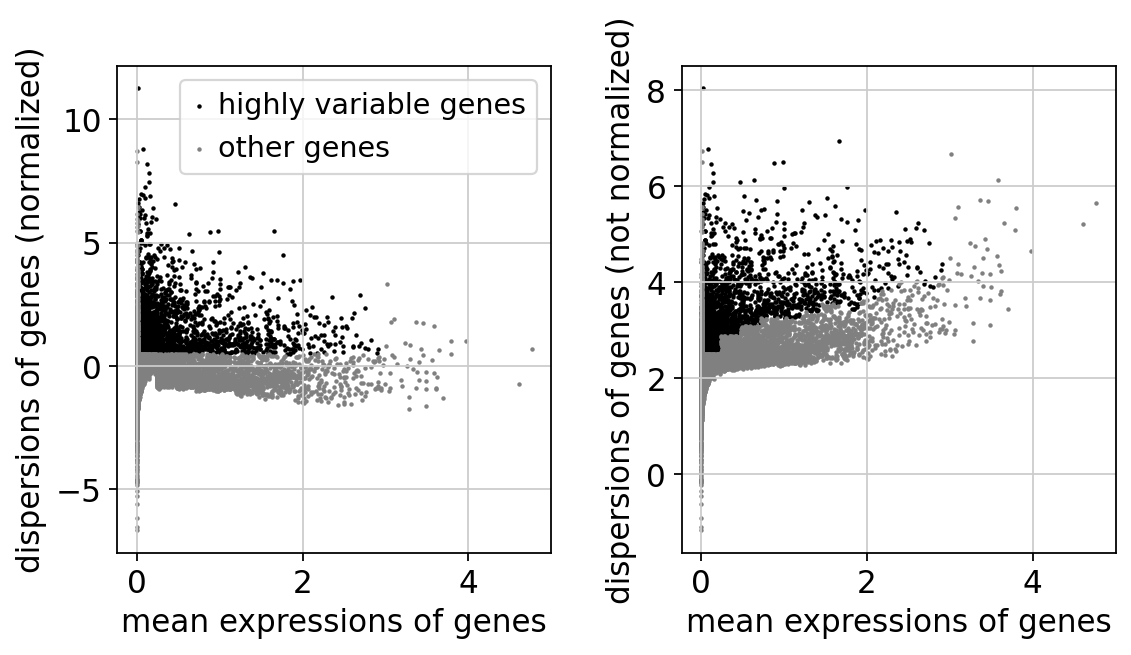

/home/tlu/miniconda3/envs/scanpy/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


### Principal component analysis
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:53)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:04:12)


In [22]:
### Identify highly-variable genes
print('### Identify highly-variable genes')
sc.pp.highly_variable_genes(adata_concat, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata_concat)
adata_concat.raw = adata_concat
adata_concat = adata_concat[:, adata_concat.var.highly_variable]
# sc.pp.regress_out(adata_concat, ['total_counts', 'pct_counts_mt'])
# adata_concat.write(f'{harmonyAnalysisFolder}/adata_concat_2.HVG.h5ad')

### Principal component analysis
print('### Principal component analysis')
sc.tl.pca(adata_concat, svd_solver='arpack', n_comps=50)
# sc.pl.pca_variance_ratio(adata_concat, log=True, n_pcs=50)

### Computing the neighborhood graph
sc.pp.neighbors(adata_concat, n_neighbors=15, n_pcs=50)

In [23]:
sc.tl.umap(adata_concat)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (1:44:06)


In [24]:
sc.tl.tsne(adata_concat)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE


/home/tlu/miniconda3/envs/scanpy/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (3:41:53)


In [25]:
### Clustering the neighborhood graph
sc.tl.leiden(adata_concat, resolution=1)
# adata_concat.obs.annotation=adata_concat.obs.annotation.replace('nan', np.NaN)


running Leiden clustering
    finished: found 83 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:08:03)


In [26]:
### Plot UMAP/tSNE
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.umap(adata_concat, color=['leiden'], 
               save=f'_adata_concat_noHarmony_leiden1.pdf', 
               legend_loc='on data', legend_fontsize=8,  show=False)
    sc.pl.umap(adata_concat, color=['ageGroup', 'sex', 'tissue'], 
               save=f'_adata_concat_noHarmony_ageGroup_sex_tissue.pdf', size=2, show=False)

    sc.pl.tsne(adata_concat, color=['leiden'], 
               save=f'_adata_concat_noHarmony_leiden1.pdf', 
               legend_loc='on data', legend_fontsize=8, show=False)
    sc.pl.tsne(adata_concat, color=['ageGroup', 'sex', 'tissue'], 
               save=f'_adata_concat_noHarmony_ageGroup_sex_tissue.pdf', size=2, show=False)


for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{figure1PicFolder}/{x}')

print()

... storing 'tissue' as categorical
... storing 'age' as categorical
... storing 'dataset' as categorical
... storing 'fca_id' as categorical
... storing 'R_annotation' as categorical
... storing 'R_annotation__ontology_id' as categorical
... storing 'R_annotation_broad' as categorical
... storing 'R_annotation_broad__ontology_id' as categorical
... storing 'annotation' as categorical
... storing 'annotation__ontology_id' as categorical
... storing 'annotation_broad' as categorical
... storing 'annotation_broad__ontology_id' as categorical
... storing 'mt-1' as categorical
... storing 'rRNA-1' as categorical


In [27]:
### Output files
print('### Output files')
adata_concat.write(f'{figure1Folder}/2.HVG-tsne_adata_concat.h5ad')

... storing 'mt-1' as categorical
... storing 'rRNA-1' as categorical


### Output files


### Harmony: all body cells

In [16]:
adata_concat=sc.read(f'{figure1Folder}/2.HVG-tsne_adata_concat.h5ad')

In [17]:
adata_concat_harmony=adata_concat.copy()

In [18]:
vars_use = ['age'] # 'age', 'sex'
ho = hm.run_harmony(adata_concat_harmony.obsm['X_pca'], adata_concat.obs, vars_use)

2022-08-06 22:58:21,074 - harmonypy - INFO - Iteration 1 of 10
2022-08-06 23:05:01,522 - harmonypy - INFO - Iteration 2 of 10
2022-08-06 23:11:31,480 - harmonypy - INFO - Converged after 2 iterations


In [19]:
res = pd.DataFrame(ho.Z_corr)
res.columns = ['X{}'.format(i + 1) for i in range(res.shape[1])]
adata_concat_harmony.obsm['X_pca'] = res.T.to_numpy()

**Computing the neighborhood graph**

In [20]:
sc.pp.neighbors(adata_concat_harmony, n_neighbors=15, n_pcs=50)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:04:09)


**Embedding the neighborhood graph**

In [21]:
sc.tl.umap(adata_concat_harmony)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:30:15)


In [22]:
sc.tl.tsne(adata_concat_harmony, n_pcs=50)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE


/home/tlu/miniconda3/envs/scanpy/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (3:56:21)


In [23]:
### Output results
adata_concat_harmony.write(f'{figure1Folder}/3.harmony.h5ad')

In [24]:
for leidenRes in leiden_L:
    print('leidenRes: ', leidenRes)
    leidenNum=float(leidenRes.split('_')[-1])

    sc.tl.leiden(adata_concat_harmony, resolution=leidenNum)
    adata_concat_harmony.obs[f'{leidenRes}']=adata_concat_harmony.obs.leiden

leidenRes:  leiden_1.0
running Leiden clustering
    finished: found 73 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:11:39)
leidenRes:  leiden_2.0
running Leiden clustering
    finished: found 98 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:19:20)
leidenRes:  leiden_3.0
running Leiden clustering
    finished: found 124 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:19:13)
leidenRes:  leiden_4.0
running Leiden clustering
    finished: found 145 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:19:01)
leidenRes:  leiden_5.0
running Leiden clustering
    finished: found 161 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:20:15)
leidenRes:  leiden_6.0
running Leiden clustering
    finished: found 175 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:22:11)
leidenRes:  leiden_7.0
running Leiden clus

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


    finished: found 898 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:41:14)


In [25]:
### Output results
adata_concat_harmony.write(f'{figure1Folder}/4.leiden.h5ad')

In [26]:
adata_concat_harmony=adata_concat_harmony.raw.to_adata()

In [27]:
### Output results
adata_concat_harmony.write(f'{figure1Folder}/5.leiden_raw.h5ad')

### Plot tsne/umap

In [28]:
adata_concat_harmony=sc.read(f'{figure1Folder}/4.leiden.h5ad')

In [29]:
### Plot UMAP/tSNE
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.umap(adata_concat_harmony, color=['ageGroup', 'sex', 'tissue'], show=False, 
               save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_ageGroup_sex_tissue.pdf')
    sc.pl.umap(adata_concat_harmony, color=['ageGroup', 'sex', 'tissue'], show=False, size=2,
               save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_ageGroup_sex_tissue_size2.pdf')
    sc.pl.umap(adata_concat_harmony, color=['annotation'], size=2, show=False, 
               save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_annotation.pdf')


    sc.pl.tsne(adata_concat_harmony, color=['ageGroup', 'sex', 'tissue'], show=False,
               save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_ageGroup_sex_tissue.pdf')
    sc.pl.tsne(adata_concat_harmony, color=['ageGroup', 'sex', 'tissue'], show=False,  size=2,
               save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_ageGroup_sex_tissue_size2.pdf')
    sc.pl.tsne(adata_concat_harmony, color=['annotation'], size=2, show=False,
               save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_annotation.pdf')

    
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{figure1PicFolder}/{x}')

the obs value 'annotation' has more than 103 categories. Uniform 'grey' color will be used for all categories.


In [30]:
### Plot UMAP/tSNE
with rc_context({'figure.figsize': (6, 6)}):
    for leidenRes in leiden_L:
        print('leidenRes: ', leidenRes)
        
        sc.pl.umap(adata_concat_harmony, color=[f'{leidenRes}'], 
                   save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_{leidenRes}.pdf', 
                   legend_loc='on data', legend_fontsize=7, size=1.5, show=False)
        sc.pl.tsne(adata_concat_harmony, color=[f'{leidenRes}'], 
                   save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_{leidenRes}.pdf', 
                   legend_loc='on data', legend_fontsize=7, size=1.5, show=False)
    
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{figure1PicFolder}/{x}')

leidenRes:  leiden_1.0
leidenRes:  leiden_2.0
leidenRes:  leiden_3.0
the obs value 'leiden_3.0' has more than 103 categories. Uniform 'grey' color will be used for all categories.
leidenRes:  leiden_4.0
the obs value 'leiden_4.0' has more than 103 categories. Uniform 'grey' color will be used for all categories.
leidenRes:  leiden_5.0
the obs value 'leiden_5.0' has more than 103 categories. Uniform 'grey' color will be used for all categories.
leidenRes:  leiden_6.0
the obs value 'leiden_6.0' has more than 103 categories. Uniform 'grey' color will be used for all categories.
leidenRes:  leiden_7.0
the obs value 'leiden_7.0' has more than 103 categories. Uniform 'grey' color will be used for all categories.
leidenRes:  leiden_8.0
the obs value 'leiden_8.0' has more than 103 categories. Uniform 'grey' color will be used for all categories.
leidenRes:  leiden_9.0
the obs value 'leiden_9.0' has more than 103 categories. Uniform 'grey' color will be used for all categories.
leidenRes:  leid

In [101]:
### Check three major markers
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.umap(adata_concat_harmony, color=['grh', 'Mhc', 'Syt1'], color_map='magma',
               save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_grh_Mhc_Syt1.pdf', size=2, show=False)
    sc.pl.tsne(adata_concat_harmony, color=['grh', 'Mhc', 'Syt1'], color_map='magma',
               save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_grh_Mhc_Syt1.pdf', size=2, show=False)
    
    
    sc.pl.tsne(adata_concat_harmony[~adata_concat_harmony.obs.age.isin(age_L[1:])], 
               color=['age'], size=2, show=False,
               save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_5dwithin.pdf')
    sc.pl.umap(adata_concat_harmony[~adata_concat_harmony.obs.age.isin(age_L[1:])], 
               color=['age'], size=2, show=False,
               save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_5dwithin.pdf')
    
    
    for age in age_L:
        sc.pl.tsne(adata_concat_harmony, 
                   color=['ageGroup'], groups=f'{age}', show=False, na_in_legend=False, size=2,
                   save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_{age}d.pdf')
        sc.pl.umap(adata_concat_harmony, 
                   color=['ageGroup'], groups=f'{age}', show=False, na_in_legend=False, size=2,
                   save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_{age}d.pdf')
    

/home/tlu/miniconda3/envs/scanpy/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


/home/tlu/miniconda3/envs/scanpy/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


In [102]:
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{figure1PicFolder}/{x}')

In [33]:
### Plot UMAP/tSNE
annotBroadFolder=f'{figure1PicFolder}/annotation_broad'
os.makedirs(annotBroadFolder, exist_ok=True)

with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.umap(adata_concat_harmony, color=['annotation_broad'], na_in_legend=False,
               save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_annotation_broad.pdf', 
               legend_loc='on data', legend_fontsize=7, size=1.5, show=False)
    sc.pl.tsne(adata_concat_harmony, color=['annotation_broad'], na_in_legend=False,
               save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_annotation_broad.pdf', 
               legend_loc='on data', legend_fontsize=7, size=1.5, show=False)
    
    for annot in adata_concat_harmony.obs.annotation_broad.cat.categories:
        sc.pl.umap(adata_concat_harmony, color=['annotation_broad'], groups=annot, na_in_legend=False,
                   save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_{annot}.pdf', 
                   legend_loc='on data', legend_fontsize=7, size=1.5, show=False)
        sc.pl.tsne(adata_concat_harmony, color=['annotation_broad'], groups=annot, na_in_legend=False,
                   save=f'_adata_afcaFca_bodyHeadTissues_wHarmony_{annot}.pdf', 
                   legend_loc='on data', legend_fontsize=7, size=1.5, show=False)
    
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{annotBroadFolder}/{x}')

## Match afca_annotation with broad_annotation

In [16]:
adata_concat_harmony=sc.read(f'{figure1Folder}/4.leiden.h5ad')

In [17]:
adata_concat_harmony.obs.annotation_broad_extrapolated.cat.categories

Index(['cardial cell', 'epithelial cell', 'excretory system', 'fat cell',
       'female germline cell', 'female reproductive system', 'gland',
       'glial cell', 'hemocyte', 'male germline cell',
       'male reproductive system', 'muscle cell', 'nan', 'neuron', 'oenocyte',
       'sensory neuron', 'somatic precursor cell', 'tracheolar cell'],
      dtype='object')

In [18]:
[x for x in adata_concat_harmony.obs.annotation.cat.categories if 'trache' in x]

['adult tracheal cell', 'adult tracheocyte']

In [19]:
[x for x in adata_concat_harmony.obs.annotation_broad_extrapolated.cat.categories if 'trache' in x]

['tracheolar cell']

In [20]:
# Modify "tracheolar cell" to "tracheal cell"
adata_concat_harmony.obs['annotation_broad_extrapolated']=\
    pd.Categorical(
    [x if 'trache' not in x else "tracheal cell" for x in adata_concat_harmony.obs.annotation_broad_extrapolated])

In [21]:
[x for x in adata_concat_harmony.obs.annotation_broad_extrapolated.cat.categories if 'trache' in x]

['tracheal cell']

In [22]:
facTableS2_Df = pd.read_csv(f'{fcaDatasetFolder}/science.fca_table_s2.csv')

In [23]:
facTableS2_Df.columns

Index(['Tissue', 'Annotation', 'Annotation ID (Fbt)', 'Broad annotation',
       'Broad annotation ID (Fbt)', 'Curators Markers', 'Publication DOI',
       'Publications', 'Up Votes', 'Down Votes', 'Curators (Up)',
       'Curators (Down)', 'Cluster', 'Top Computed Markers',
       'Top Computed Markers (no CR, no CG)', 'Note'],
      dtype='object')

In [24]:
facTableS2_Df['Broad annotation'].value_counts()

neuron                        61
sensory neuron                48
epithelial cell               34
male germline cell            19
glial cell                    16
female reproductive system    16
male reproductive system      16
excretory system              11
muscle cell                   10
female germline cell           6
gland                          6
somatic precursor cell         6
cardial cell                   4
hemocyte                       3
fat cell                       2
artefact                       2
oenocyte                       1
tracheolar cell                1
Name: Broad annotation, dtype: int64

In [25]:
facTableS2_Df.index=facTableS2_Df.Annotation.to_list()

In [26]:
# Modify "tracheolar cell" to "tracheal cell"
facTableS2_Df.loc['adult tracheocyte', 'Broad annotation']="tracheal cell"

In [27]:
facTableS2_Df['Broad annotation'].value_counts()

neuron                        61
sensory neuron                48
epithelial cell               34
male germline cell            19
glial cell                    16
female reproductive system    16
male reproductive system      16
excretory system              11
muscle cell                   10
female germline cell           6
gland                          6
somatic precursor cell         6
cardial cell                   4
hemocyte                       3
fat cell                       2
artefact                       2
oenocyte                       1
tracheal cell                  1
Name: Broad annotation, dtype: int64

In [28]:
fcaS2_annotBroad_D=dict(zip(facTableS2_Df.Annotation.to_list(), facTableS2_Df['Broad annotation'].to_list()))
fcaS2_annotBroad_D.pop('artefact')
fcaS2_annotBroad_D.pop('antimicrobial peptide-producing cell')

# fcaS2_annotBroad_D

'artefact'

In [30]:
annot_gorupDf =adata_concat_harmony.obs.groupby(by=['annotation', 'annotation_broad_extrapolated']).count()

In [34]:
broadAnnot_D={}
for annotation in annot_gorupDf.index.get_level_values('annotation').categories:
    broadAnnotDf=\
        pd.DataFrame(annot_gorupDf.loc[annotation][annot_gorupDf.loc[annotation].n_genes_by_counts > 0
                                                  ].n_genes_by_counts).n_genes_by_counts.sort_values(ascending=False)
    broadAnnotN = len(broadAnnotDf)
    
    if broadAnnotN > 1:
        print(annotation)
        print(broadAnnotN)
        print(broadAnnotDf)
        print(broadAnnotDf.index[0])
        print()
        # print(broadAnnotSeries.max())
        # print()
    
    if annotation == 'pigment cell':
        broadAnnot_D[annotation] = 'glial cell'
    elif 'spermatocyte' in annotation:
        if 'cyst' not in annotation:
            broadAnnot_D[annotation] = 'male germline cell'
        else: broadAnnot_D[annotation]='male reproductive system'
    elif 'spermatid' in annotation: 
        if 'cyst' not in annotation:
            broadAnnot_D[annotation] = 'male germline cell'
        else: broadAnnot_D[annotation] = 'male reproductive system'
    elif 'spermatogonium' in annotation:
        broadAnnot_D[annotation] = 'male germline cell'
    elif 'cyst cell' in annotation:
        broadAnnot_D[annotation]='male reproductive system'
    else:
        broadAnnot_D[annotation]=broadAnnotDf.index[0]
    ### no pigment cell in the "annotation_broad_extrapolated"
    
    
    # "btl-GAL4 positive female cell" => assign annotation separately in the whole adata.obs
    # female => female reproductive system
    # male => male reproductive system

16-cell germline cyst in germarium region 2a and 2b
3
annotation_broad_extrapolated
female germline cell          576
female reproductive system     51
neuron                          1
Name: n_genes_by_counts, dtype: int64
female germline cell

CNS surface associated glial cell
2
annotation_broad_extrapolated
glial cell         68
epithelial cell     3
Name: n_genes_by_counts, dtype: int64
glial cell

Johnston organ neuron
5
annotation_broad_extrapolated
sensory neuron                4310
neuron                          29
female reproductive system       6
epithelial cell                  5
glial cell                       2
Name: n_genes_by_counts, dtype: int64
sensory neuron

T neuron T2
2
annotation_broad_extrapolated
neuron            603
sensory neuron      1
Name: n_genes_by_counts, dtype: int64
neuron

T neuron T2a
2
annotation_broad_extrapolated
neuron            621
sensory neuron      1
Name: n_genes_by_counts, dtype: int64
neuron

T neuron T4/T5a-b
2
annotation_broad_extra

In [36]:
for broadAnnot in fcaS2_annotBroad_D.keys():
    # if fcaS2_annotBroad_D[broadAnnot] == 'tracheolar cell':
    #     fcaS2_annotBroad_D[broadAnnot]='tracheal cell'
    if fcaS2_annotBroad_D[broadAnnot] == 'neuron':
        fcaS2_annotBroad_D[broadAnnot]='CNS neuron'

fcaS2_annotBroad_D['tormogen cell']='epithelial cell'
fcaS2_annotBroad_D.pop('tormogen cell ')

'epithelial cell'

In [39]:
afca_broadTemp_L=[]
for i, afca_annotation in enumerate(adata_concat_harmony.obs.afca_annotation):
    afca_annotation_noTissue = str(afca_annotation).split('_')[0]
    tissue = adata_concat_harmony.obs.tissue[i]
    annotation_broad=adata_concat_harmony.obs.annotation_broad_extrapolated[i]
    annotation=adata_concat_harmony.obs.annotation[i]
    sex=adata_concat_harmony.obs.sex[i]
    
    if tissue not in ['body', 'head']:
        # annotation_broad=broadAnnot_D[annotation]
        
        if annotation!= 'unannotated':
            #annotation_broad=fcaS2_annotBroad_D[annotation]
            
            # Use updated annotation_broad_extrapolated
            if annotation == 'male gonad associated epithelium': 
                annotation='seminal vesicle & testis epithelia'
            if annotation == 'cyst cell intermediate': annotation='spermatid associated cyst cell'
            if annotation == 'late cyst cell branch a': annotation='terminal epithelial cell of testis'
            if annotation == 'late cyst cell branch b': annotation='somatic cell at base of testis'
            if annotation == 'adult tracheal cell': annotation='adult tracheocyte'
            if annotation == 'visceral muscle of the crop': annotation='adult crop circular muscle'
            if annotation == 'visceral muscle of the midgut': annotation='adult midgut muscle'
            if annotation == 'tormogen cell ': annotation='tormogen cell'
            # if 'trache' in annotation: annotation='adult tracheocyte'
            
            
            
            if annotation in fcaS2_annotBroad_D.keys():
                annotation_broad=fcaS2_annotBroad_D[annotation]
            
            if 'btl-GAL4 positive female cell' in annotation:
                if sex == 'male' :
                    annotation_broad='male reproductive system'
            if 'follicle' in annotation:
                annotation_broad='female reproductive system'
            if annotation_broad == 'neuron': annotation_broad='CNS neuron'
        else:
            if annotation_broad == 'neuron': annotation_broad='CNS neuron'
            
        if annotation_broad == 'nan': 
            annotation_broad='unannotated'

            
        afca_broadTemp_L.append(annotation_broad)
    else:
        if afca_annotation_noTissue not in fcaS2_annotBroad_D.keys(): 
            # print(afca_annotation)

            if afca_annotation == 'seminal vesicle & testis epithelia':
                afca_broadTemp_L.append('male reproductive system')
            elif afca_annotation == 'cyst cell': afca_broadTemp_L.append('male reproductive system')
            elif re.match('^neuron \d{1,2}$', afca_annotation) is not None: afca_broadTemp_L.append('CNS neuron')
            else: afca_broadTemp_L.append('unannotated')

        else:
            if 'follicle' in afca_annotation_noTissue:
                afca_broadTemp_L.append('female reproductive system')
            else:
                afca_broadTemp_L.append(fcaS2_annotBroad_D[afca_annotation_noTissue])

In [40]:
len(afca_broadTemp_L) #868209

868209

In [41]:
adata_concat_harmony.obs['afca_broadTemp'] = pd.Categorical(afca_broadTemp_L)

In [42]:
adata_concat_harmony.obs.afca_broadTemp.value_counts()

epithelial cell               157542
unannotated                   123359
CNS neuron                    110759
muscle cell                   110294
sensory neuron                 81524
fat cell                       63739
female reproductive system     56759
glial cell                     38476
male germline cell             22670
male reproductive system       19749
gland                          15626
oenocyte                       14774
tracheal cell                  12809
hemocyte                       11734
excretory system               10754
female germline cell            9002
somatic precursor cell          8231
cardial cell                     408
Name: afca_broadTemp, dtype: int64

In [45]:
### Plot UMAP/tSNE
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.tsne(adata_concat_harmony, color=['annotation_broad_extrapolated'], size=2, show=False,
              save=f'_adata_concat_harmony_annotation_broad_extrapolated.pdf')
    sc.pl.tsne(adata_concat_harmony, color=['afca_broadTemp'], size=2, show=False,
              save=f'_adata_concat_harmony_afca_broadTemp_wUnannotated.pdf')
    sc.pl.tsne(adata_concat_harmony[adata_concat_harmony.obs['afca_broadTemp'] != 'unannotated'], 
               color=['afca_broadTemp'], size=2, show=False,
               save=f'_adata_concat_harmony_afca_broadTemp.pdf')
    # sc.pl.tsne(adata_concat_harmony, color=['afca_broadTemp'], groups='nan', na_in_legend=False, size=2)
    sc.pl.tsne(adata_concat_harmony, color=['afca_broadTemp'], 
               groups='unannotated', na_in_legend=False, size=2, show=False,
               save=f'_adata_concat_harmony_afca_broadTemp_unannotated.pdf')

    sc.pl.umap(adata_concat_harmony, color=['annotation_broad_extrapolated'], size=2, show=False,
              save=f'_adata_concat_harmony_annotation_broad_extrapolated.pdf')
    sc.pl.umap(adata_concat_harmony, color=['afca_broadTemp'], size=2, show=False,
              save=f'_adata_concat_harmony_afca_broadTemp_wUnannotated.pdf')
    sc.pl.umap(adata_concat_harmony[adata_concat_harmony.obs['afca_broadTemp'] != 'unannotated'], 
               color=['afca_broadTemp'], size=2, show=False,
               save=f'_adata_concat_harmony_afca_broadTemp.pdf')
    # sc.pl.tsne(adata_concat_harmony, color=['afca_broadTemp'], groups='nan', na_in_legend=False, size=2)
    sc.pl.umap(adata_concat_harmony, color=['afca_broadTemp'], 
               groups='unannotated', na_in_legend=False, size=2, show=False,
               save=f'_adata_concat_harmony_afca_broadTemp_unannotated.pdf')
    
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{figure1PicFolder}/{x}')

/home/tlu/miniconda3/envs/scanpy/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


/home/tlu/miniconda3/envs/scanpy/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [46]:
### Plot UMAP/tSNE
with rc_context({'figure.figsize': (6, 6)}):
    # cell# at different ages in the head/body
    for age in ['5', '30', '50', '70']:
        sc.pl.tsne(adata_concat_harmony[adata_concat_harmony.obs.tissue.isin(['body', 'head'])], 
                   color=['age'], groups=age, size=2, show=False, na_in_legend=False,
                  save=f'_adata_concat_harmony_bodyHead_{age}d.pdf')
        sc.pl.umap(adata_concat_harmony[adata_concat_harmony.obs.tissue.isin(['body', 'head'])], 
                   color=['age'], groups=age, size=2, show=False, na_in_legend=False,
                  save=f'_adata_concat_harmony_bodyHead_{age}d.pdf')
        
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{figure1PicFolder}/{x}')

/home/tlu/miniconda3/envs/scanpy/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


/home/tlu/miniconda3/envs/scanpy/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


/home/tlu/miniconda3/envs/scanpy/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


/home/tlu/miniconda3/envs/scanpy/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


/home/tlu/miniconda3/envs/scanpy/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


/home/tlu/miniconda3/envs/scanpy/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


/home/tlu/miniconda3/envs/scanpy/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


/home/tlu/miniconda3/envs/scanpy/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


In [47]:
adata_concat_harmony.write(f'{figure1Folder}/6.afca_broadTemp.h5ad')

## Transfer annotations using logistic Regression

In [48]:
adata_concat_harmony=sc.read(f'{figure1Folder}/6.afca_broadTemp.h5ad')

In [49]:
adata_concat_harmony.obs.drop('true', axis=1, inplace=True)

In [50]:
adata_concat_harmony.obs['true']=\
    adata_concat_harmony.obs.afca_broadTemp[
    adata_concat_harmony.obs.afca_broadTemp != 'unannotated']

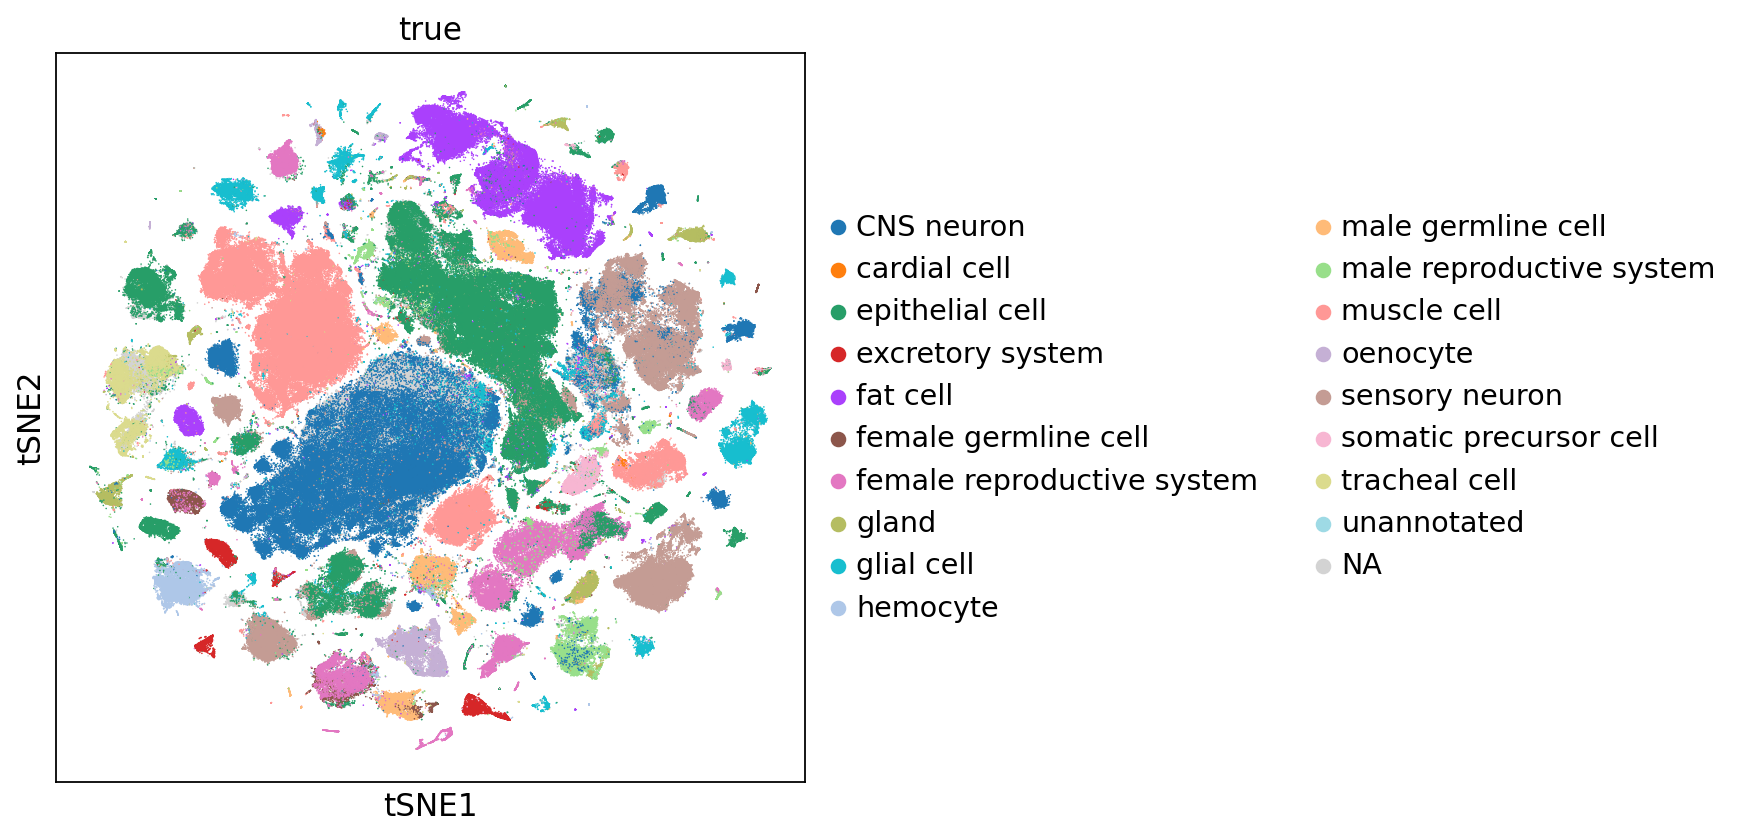

In [51]:
### Plot UMAP/tSNE
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.tsne(adata_concat_harmony, color=['true'], size=2)

In [52]:
adata_ref = adata_concat_harmony[adata_concat_harmony.obs.afca_broadTemp != 'unannotated']
adata_query=adata_concat_harmony[adata_concat_harmony.obs.afca_broadTemp == 'unannotated']

/home/tlu/miniconda3/envs/scanpy/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


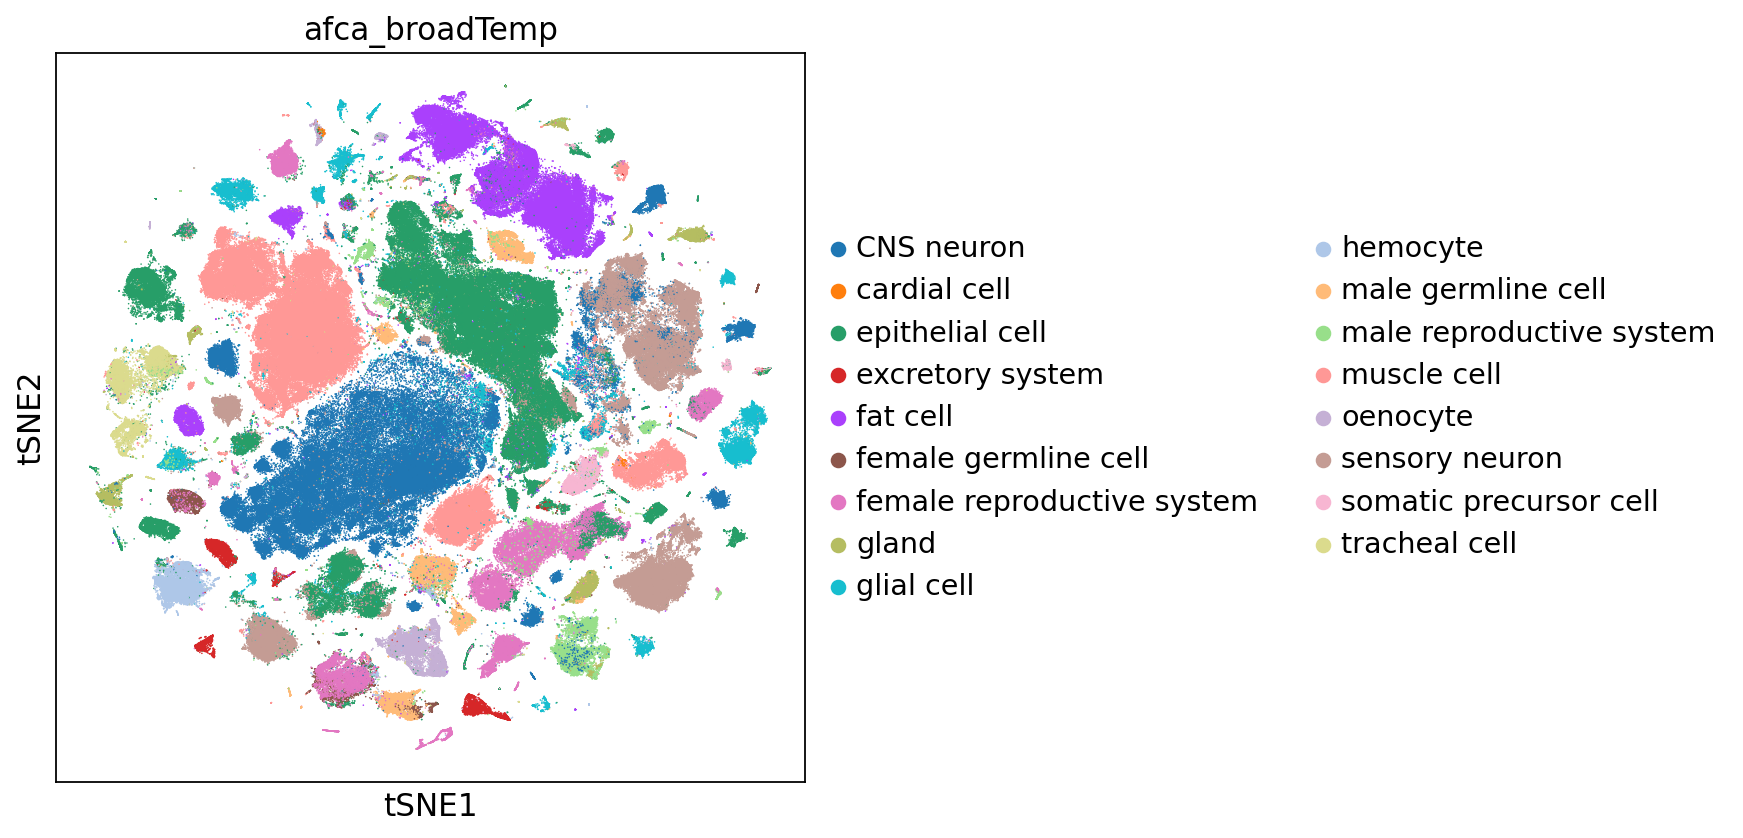

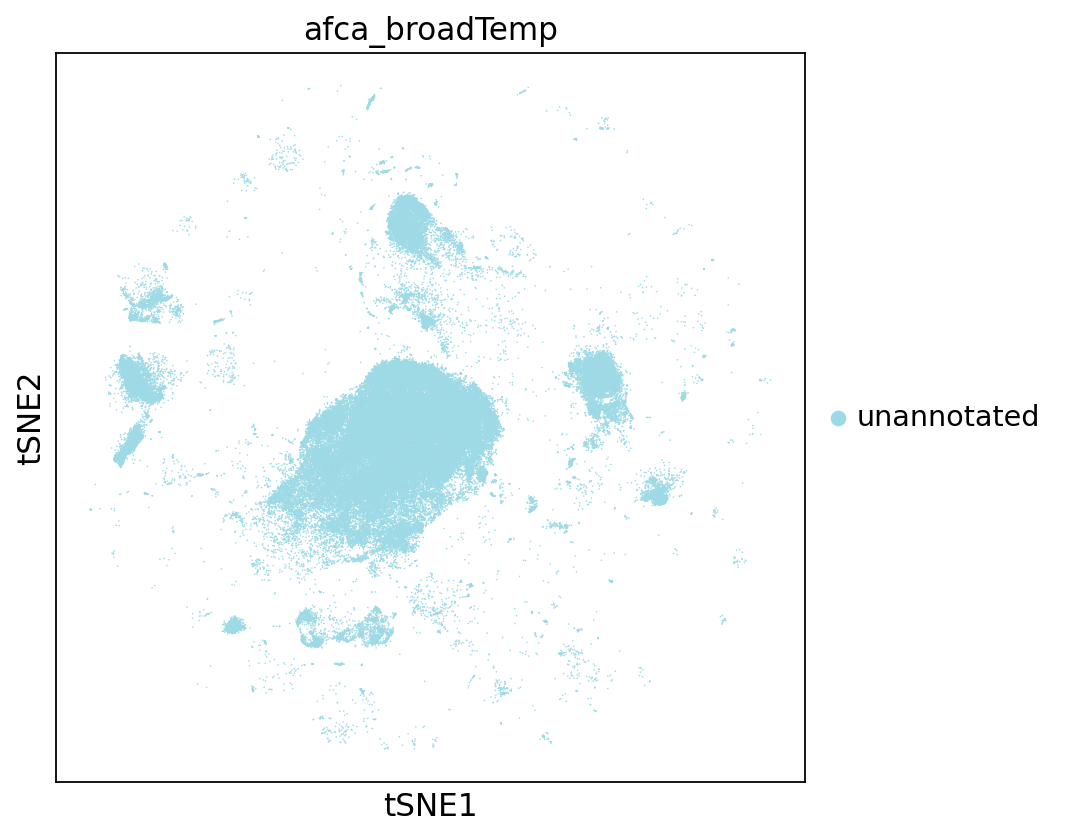

In [53]:
### Plot UMAP/tSNE
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.tsne(adata_ref, color=['afca_broadTemp'], size=2)
    sc.pl.tsne(adata_query, color=['afca_broadTemp'], size=2)

In [54]:
X_test = adata_query.obsm['X_pca']
X_train = adata_ref.obsm['X_pca']
y_train = list(adata_ref.obs.true)
clf = LogisticRegression(random_state=1, max_iter=5000)
clf.fit(X_train, y_train)
preds_ct = clf.predict(X_test)

In [55]:
adata_query.obs['true'] = pd.Categorical(preds_ct)
new_annot = dict(zip(adata_query.obs_names, adata_query.obs.true))
adata_query.obs['true'] = pd.Categorical(
    [new_annot[c] if c in new_annot else adata_query.obs.true[i] 
     for i, c in enumerate(adata_query.obs_names)])
mapping_fcaToAfca_D = dict(zip(adata_query.obs_names, adata_query.obs['true']))

Trying to set attribute `.obs` of view, copying.


In [56]:
adata_concat_harmony.obs['linearR_annotation_broad']=pd.Categorical([
    mapping_fcaToAfca_D[obs] if obs in mapping_fcaToAfca_D.keys() \
    else adata_concat_harmony.obs.loc[obs, 'afca_broadTemp'] \
    for obs in adata_concat_harmony.obs_names])

In [57]:
adata_concat_harmony.write(f'{figure1Folder}/7.linearR_annotation_broad.h5ad')

In [22]:
adata_concat_harmony=sc.read(f'{figure1Folder}/7.linearR_annotation_broad.h5ad')

In [23]:
# cellN summary

adata_concat_harmony[~adata_concat_harmony.obs.tissue.isin(['head', 'body'])].obs.ageGroup.value_counts()

/Users/tzuchiao/opt/anaconda3/envs/scanpy/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


1-5    301955
Name: ageGroup, dtype: int64

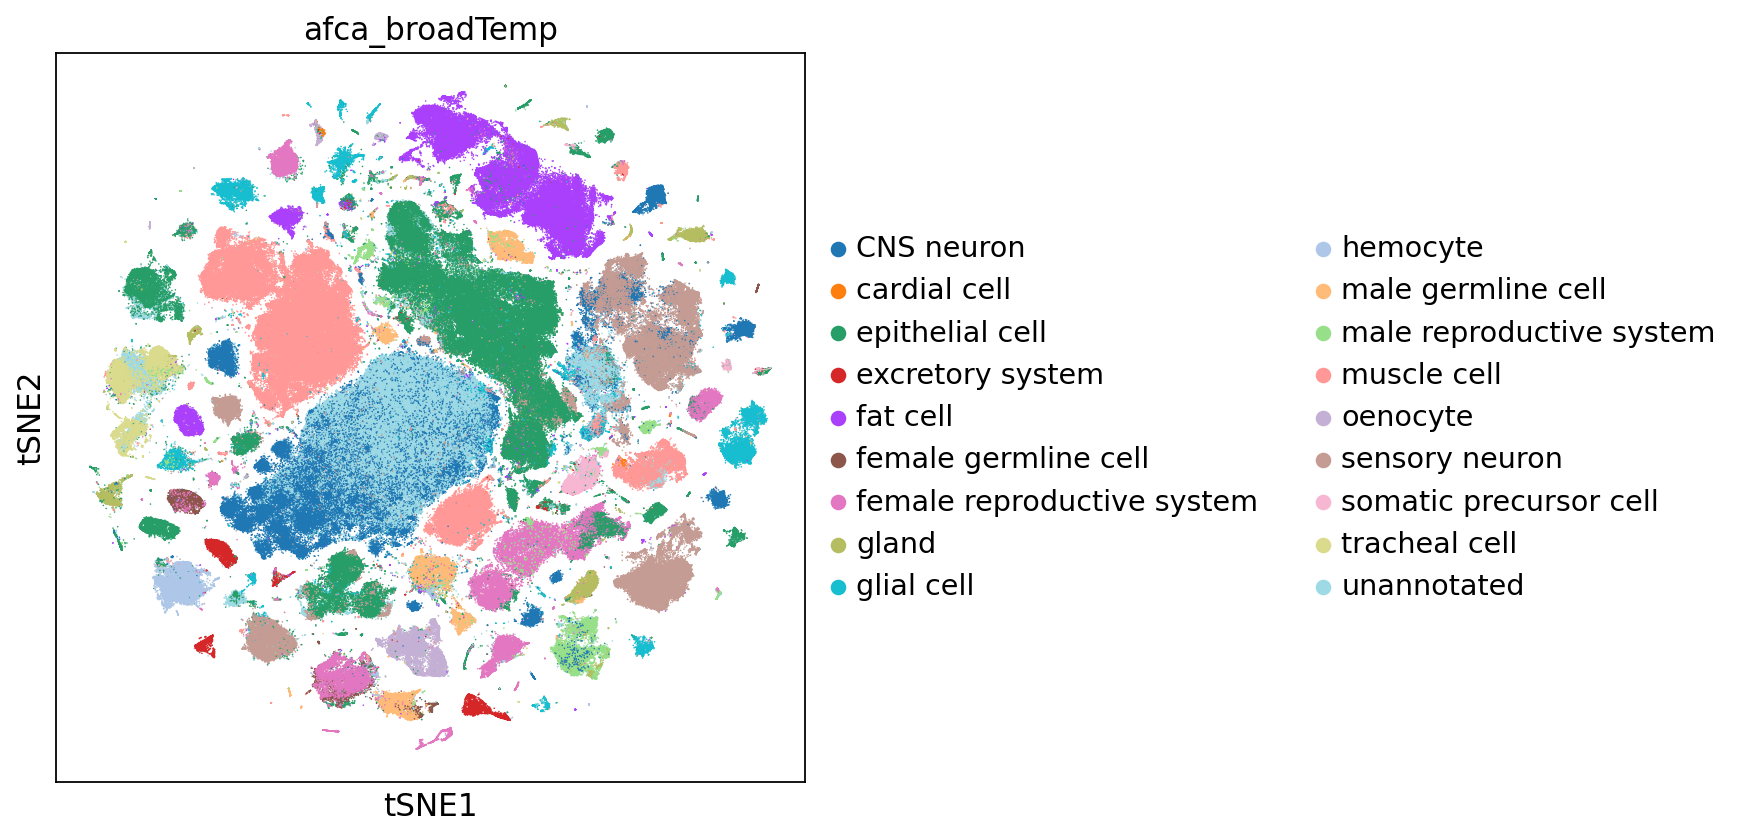

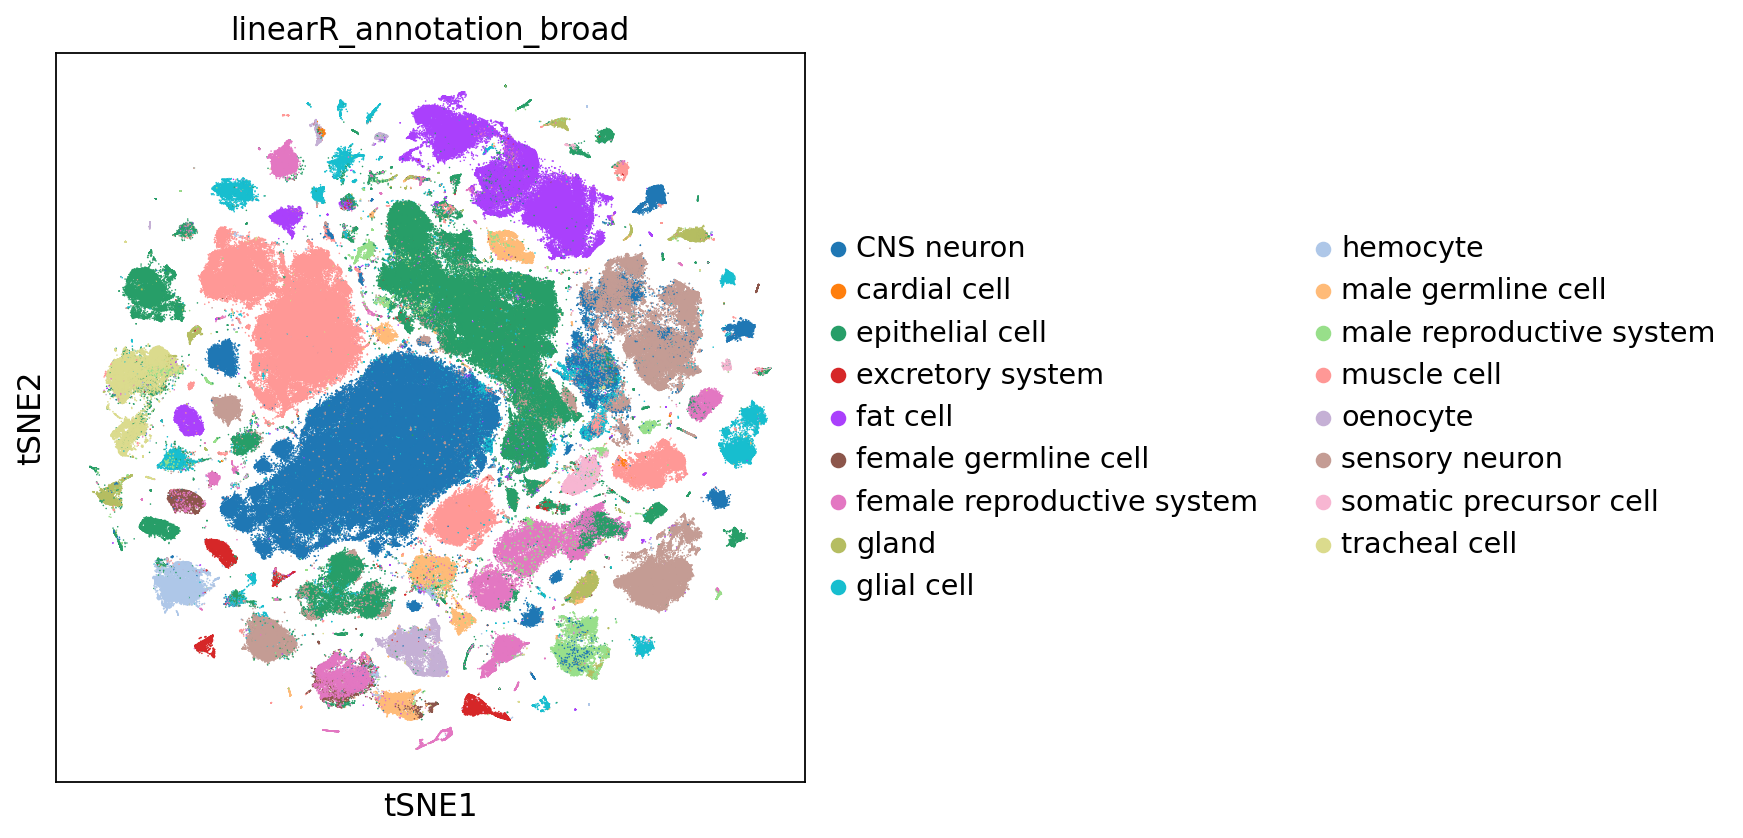

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


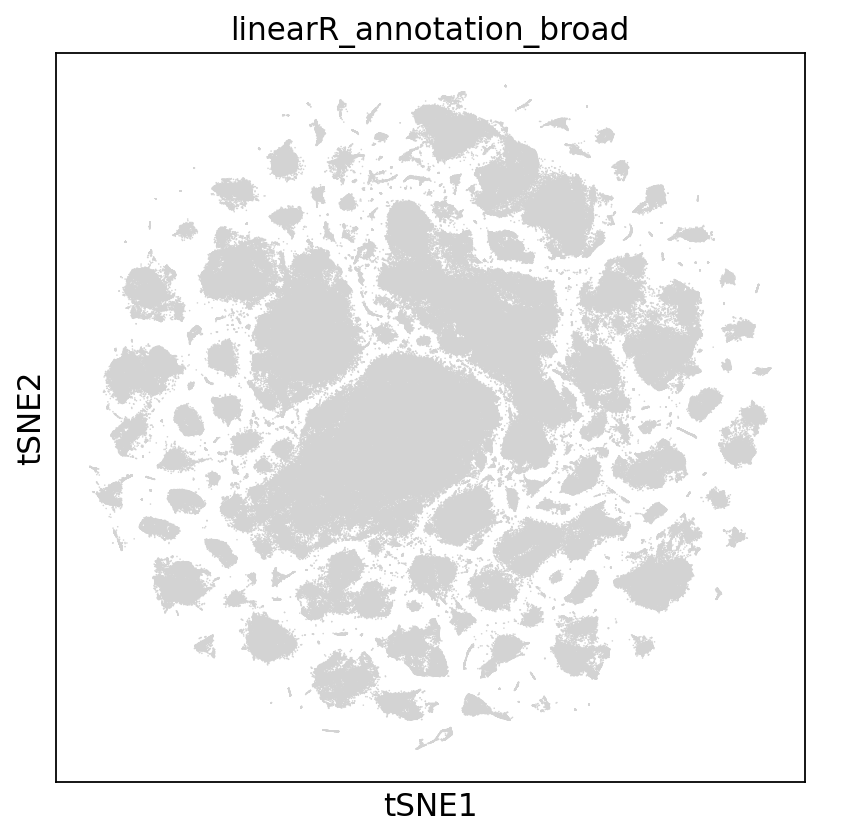

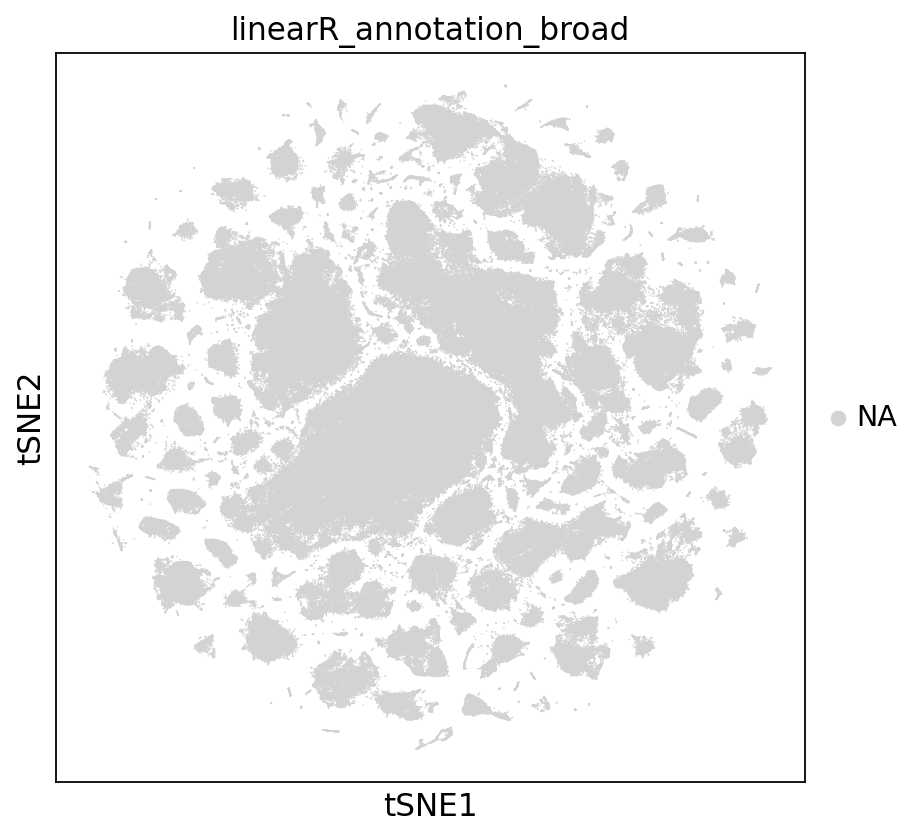

In [59]:
### Plot UMAP/tSNE
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.tsne(adata_concat_harmony, color=['afca_broadTemp'], size=2)
    sc.pl.tsne(adata_concat_harmony, color=['linearR_annotation_broad'], size=2)
    sc.pl.tsne(adata_concat_harmony, color=['linearR_annotation_broad'], groups='nan', size=2, na_in_legend=False)
    sc.pl.tsne(adata_concat_harmony, color=['linearR_annotation_broad'], groups='unannotated', size=2)

In [25]:
### Plot UMAP/tSNE
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.tsne(adata_concat_harmony, color=['linearR_annotation_broad'], size=2, show=False, title='afca_annotation_broad',
              save=f'_adata_concat_harmony_linearR_annotation_broad_extrapolated.pdf')

    sc.pl.umap(adata_concat_harmony, color=['linearR_annotation_broad'], size=2, show=False, title='afca_annotation_broad',
              save=f'_adata_concat_harmony_linearR_annotation_broad_extrapolated.pdf')

for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{figure1PicFolder}/{x}')

In [62]:
adata_concat_harmony.obs.linearR_annotation_broad.value_counts()

CNS neuron                    200018
epithelial cell               172452
muscle cell                   112557
sensory neuron                 83662
fat cell                       63762
female reproductive system     58205
glial cell                     42847
male germline cell             23182
male reproductive system       20167
tracheal cell                  20126
gland                          15738
oenocyte                       14776
hemocyte                       11801
excretory system               10867
female germline cell            9312
somatic precursor cell          8327
cardial cell                     410
Name: linearR_annotation_broad, dtype: int64

### Bar plot for cellN

In [16]:
adata_concat_harmony=sc.read(f'{figure1Folder}/7.linearR_annotation_broad.h5ad')

In [17]:
annot_L=adata_concat_harmony.obs.linearR_annotation_broad.value_counts().index.to_list()

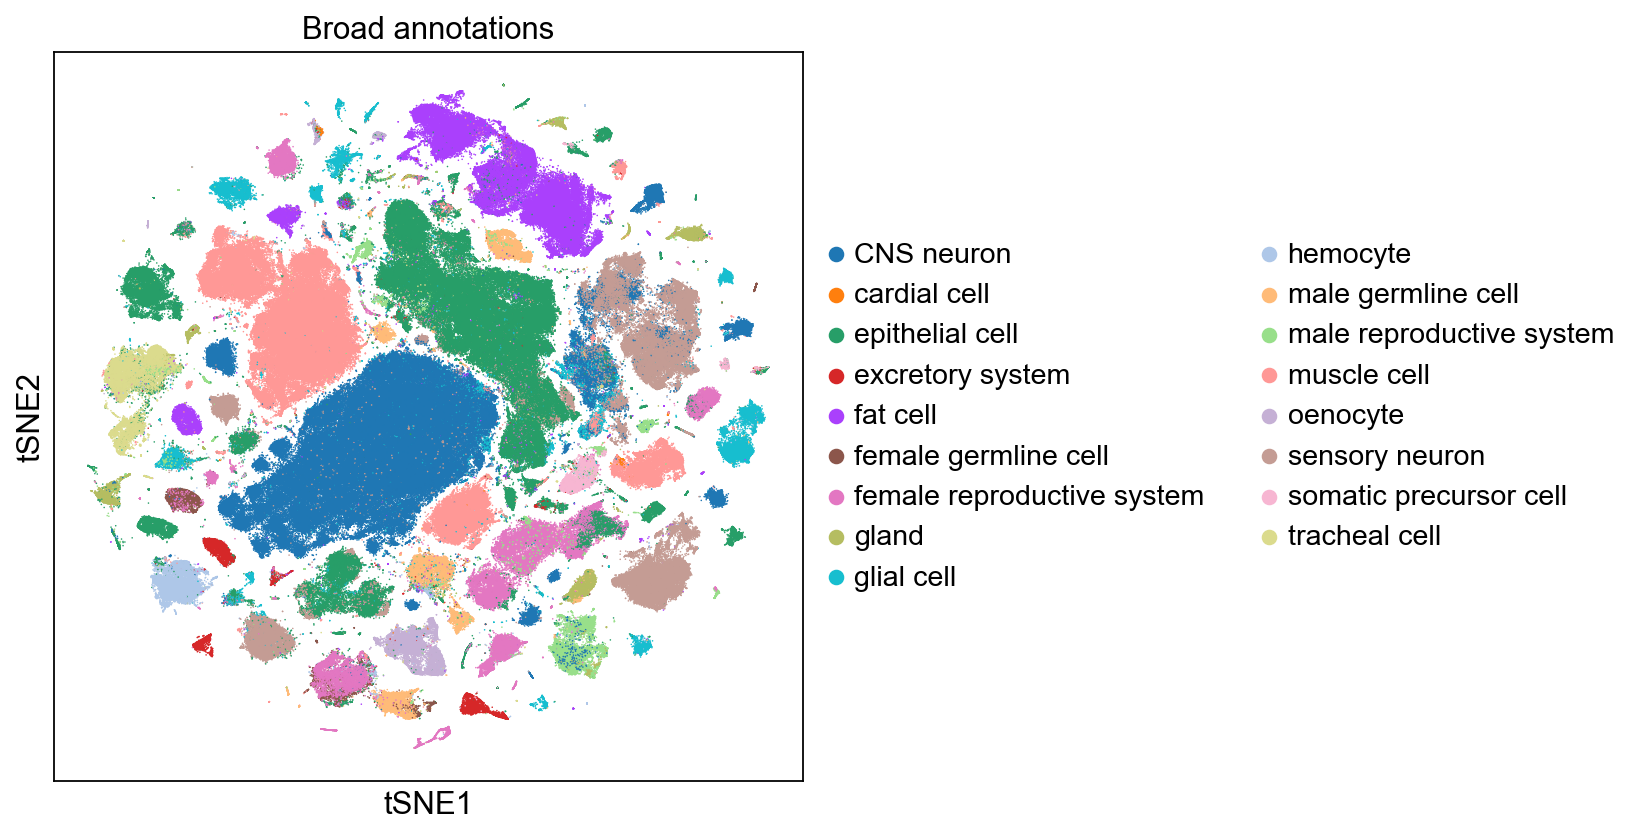

In [21]:
### Plot UMAP/tSNE
with rc_context({'figure.figsize': (6, 6)}):
    ax=sc.pl.tsne(adata_concat_harmony, color=['linearR_annotation_broad'], size=2, sort_order=False,  title='Broad annotations') 

In [30]:
annotOrder_Df = pd.DataFrame(adata_concat_harmony.obs.linearR_annotation_broad.value_counts())
annotOrder_Df.columns = ['cellN']
annotOrder_Df['annotation'] = annotOrder_Df.index.to_list()
annotOrder_Df.cellN = annotOrder_Df.cellN /1000

annotOrder_Df

cellN                  annotation
CNS neuron                  200.018                  CNS neuron
epithelial cell             172.452             epithelial cell
muscle cell                 112.557                 muscle cell
sensory neuron               83.662              sensory neuron
fat cell                     63.762                    fat cell
female reproductive system   58.205  female reproductive system
glial cell                   42.847                  glial cell
male germline cell           23.182          male germline cell
male reproductive system     20.167    male reproductive system
tracheal cell                20.126               tracheal cell
gland                        15.738                       gland
oenocyte                     14.776                    oenocyte
hemocyte                     11.801                    hemocyte
excretory system             10.867            excretory system
female germline cell          9.312        female germline cell
somatic precursor cell        8.327      somatic precursor cell
cardial cell                  0.410                cardial cell

In [23]:
color_D=dict(zip(adata_concat_harmony.obs.linearR_annotation_broad.cat.categories.to_list(), adata_concat_harmony.uns['linearR_annotation_broad_colors']))
color_D

{'CNS neuron': '#1f77b4',
 'cardial cell': '#ff7f0e',
 'epithelial cell': '#279e68',
 'excretory system': '#d62728',
 'fat cell': '#aa40fc',
 'female germline cell': '#8c564b',
 'female reproductive system': '#e377c2',
 'gland': '#b5bd61',
 'glial cell': '#17becf',
 'hemocyte': '#aec7e8',
 'male germline cell': '#ffbb78',
 'male reproductive system': '#98df8a',
 'muscle cell': '#ff9896',
 'oenocyte': '#c5b0d5',
 'sensory neuron': '#c49c94',
 'somatic precursor cell': '#f7b6d2',
 'tracheal cell': '#dbdb8d'}

In [40]:
adata_concat_harmony.obs.linearR_annotation_broad.cat.categories.to_list()

['CNS neuron',
 'cardial cell',
 'epithelial cell',
 'excretory system',
 'fat cell',
 'female germline cell',
 'female reproductive system',
 'gland',
 'glial cell',
 'hemocyte',
 'male germline cell',
 'male reproductive system',
 'muscle cell',
 'oenocyte',
 'sensory neuron',
 'somatic precursor cell',
 'tracheal cell']

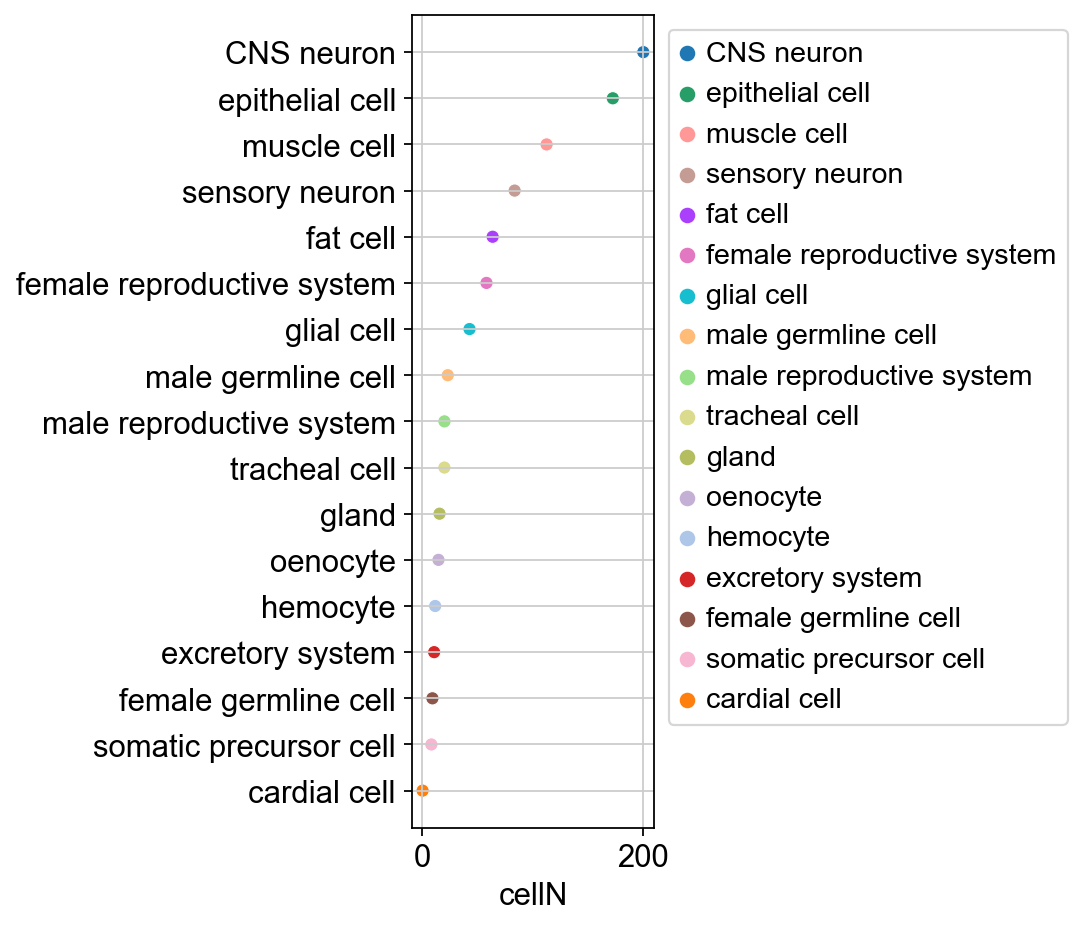

In [72]:
with rc_context({'figure.figsize': (7, 6)}):
    fig, ax = plt.subplots()
    sns.scatterplot(data=annotOrder_Df, x='cellN', y='annotation', hue='annotation', palette=color_D, ax=ax) # order=annot_L, 
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.ylabel('')
    plt.tight_layout()
    # fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # plt.subplots_adjust(top=0.95, left=0.5)
    
    plt.savefig(f'{figure1PicFolder}/afca_annotation_broad_cellN_dot.pdf')
    plt.show()

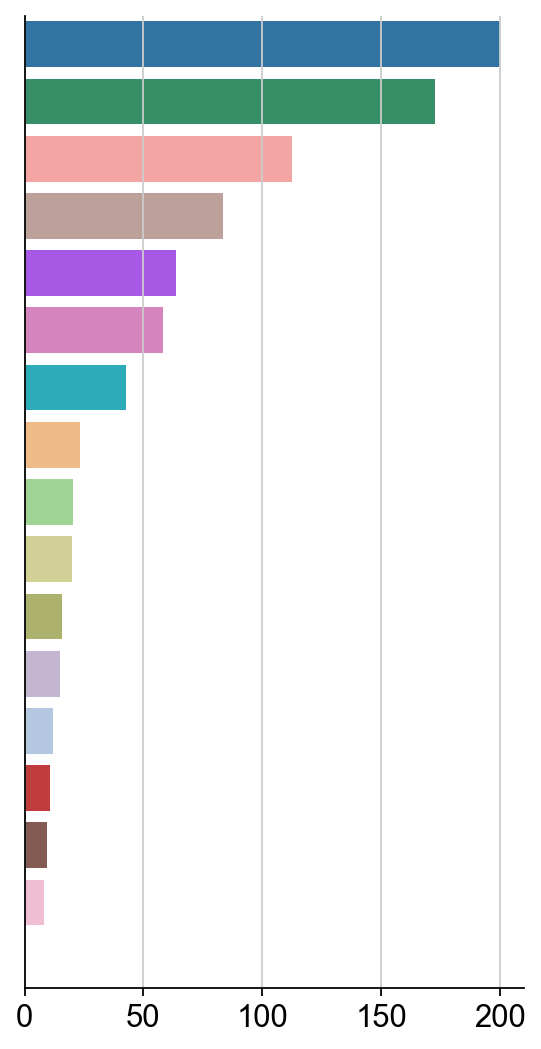

In [64]:
with rc_context({'figure.figsize': (4, 8)}):
    
    sns.barplot(data=annotOrder_Df, x='cellN', y='annotation', palette=color_D) # order=annot_L, 
    plt.ylabel('')
    plt.yticks([])
    plt.xlabel('')
    sns.despine()
    plt.savefig(f'{figure1PicFolder}/afca_annotation_broad_cellN.pdf')

# Supplemental figures

In [15]:
adata_head=sc.read(f'{allHeadBodyDataFolder}/afcaFca_head_v0.7_stringent.h5ad')
adata_body=sc.read(f'{allHeadBodyDataFolder}/afcaFca_body_v0.7_stringent.h5ad')

In [16]:
adata_headBody=sc.read(f'{allHeadBodyDataFolder}/afcaFca_headBody_v0.7_stringent_harmonyAge_batch.h5ad')

## UMI#/gene#/mito/

In [17]:
countName_D={'total_counts':'UMI#', 'n_genes_by_counts':'Gene#', 'pct_counts_mt':'mito percentage'}

In [18]:
adata_head

AnnData object with n_obs × n_vars = 289981 × 2588
    obs: 'cellBC', 'sampleGroup', 'sex', 'tissue', 'age', 'sampleN', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rRNA', 'pct_counts_rRNA', 'batch', 'dataset', 'fca_id', 'R_annotation', 'R_annotation__ontology_id', 'R_annotation_broad', 'R_annotation_broad__ontology_id', 'annotation', 'annotation__ontology_id', 'annotation_broad', 'annotation_broad__ontology_id', 'annotation_broad_extrapolated', 'annotation_broad_extrapolated__ontology_id', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_rRNA', 'leiden', 'leiden_1.0', 'leiden_2.0', 'leiden_3.0', 'leiden_4.0', 'leiden_5.0', 'leiden_6.0', 'leiden_7.0', 'leiden_8.0', 'leiden_9.0', 'leiden_10.0', 'leiden_20.0', 'leiden_30.0', 'leiden_40.0', 'leiden_50.0', 'sex_age', 'true', 'linearR_annotation', 'afca_annotation', 'afca_annotation_broad'
    var: 'gene_ids-0-0', 'geneName-0-0', 'gene_ids-1-0'

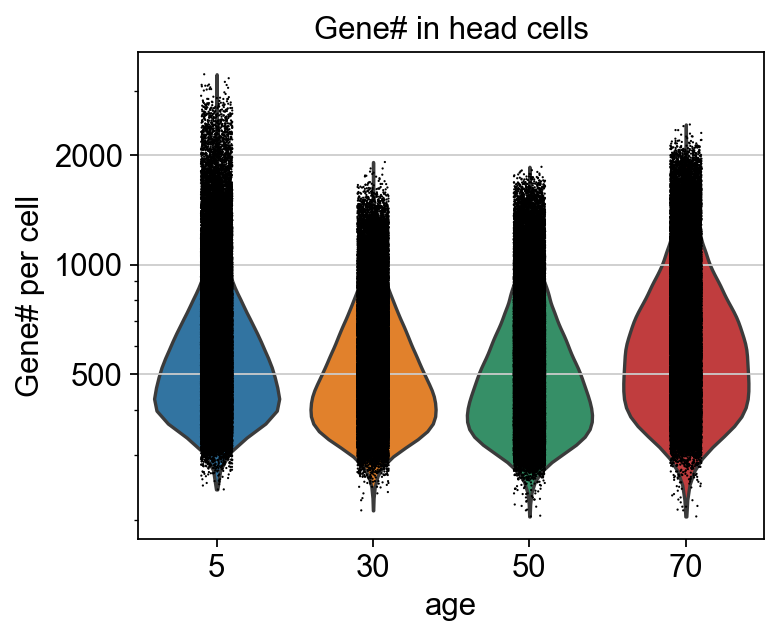

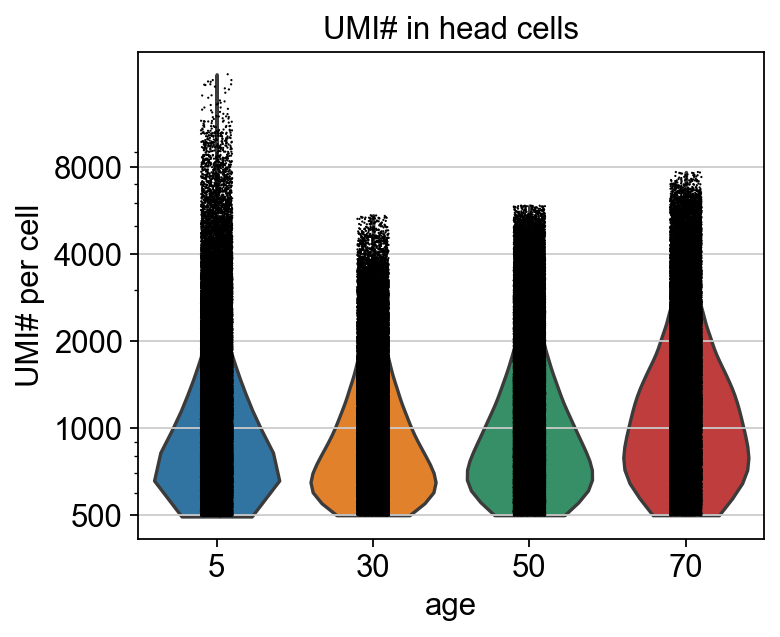

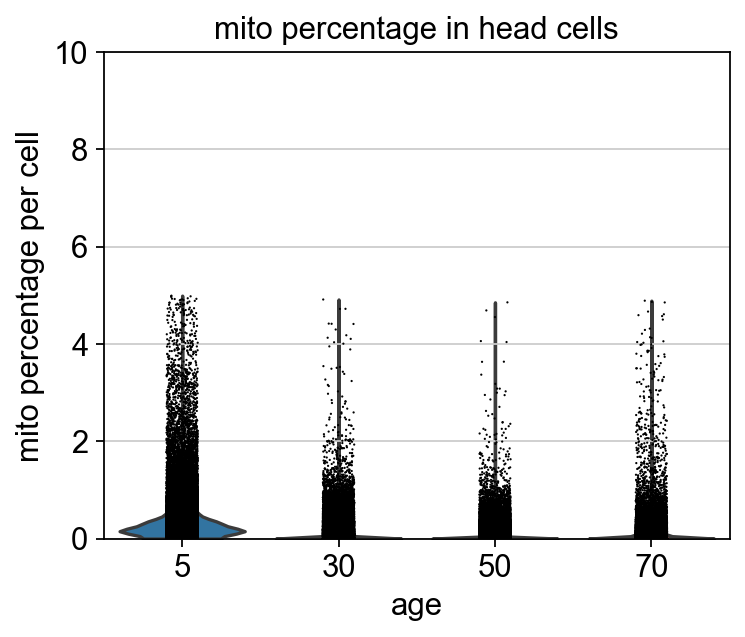

In [27]:
tissue='head'

with rc_context({'figure.figsize': (5, 4)}):
    # fig, axs = plt.subplots(1, 3)
    for i, feature in enumerate(['n_genes_by_counts', 'total_counts', 'pct_counts_mt']):
        g=sc.pl.violin(adata_head, keys=[feature], groupby='age', show=False)
        plt.ylabel(f'{countName_D[feature]} per cell')
        plt.title(f'{countName_D[feature]} in {tissue} cells')
        
        if feature in ['n_genes_by_counts', 'total_counts']:
            plt.yscale("log")
            if feature == 'n_genes_by_counts':
                plt.yticks(ticks=[500, 1000, 2000], labels=[500, 1000, 2000])
            else:
                plt.yticks(ticks=[500, 1000, 2000, 4000, 8000], labels=[500, 1000, 2000, 4000, 8000])
        else:
            plt.ylim(0, 10)
        
        # plt.tight_layout()
        
        plt.savefig(f'{figure1PicFolder}/violin_{tissue}_{feature}.pdf', dpi=300)
        plt.savefig(f'{figure1PicFolder}/violin_{tissue}_{feature}.png', dpi=300)
        plt.show()

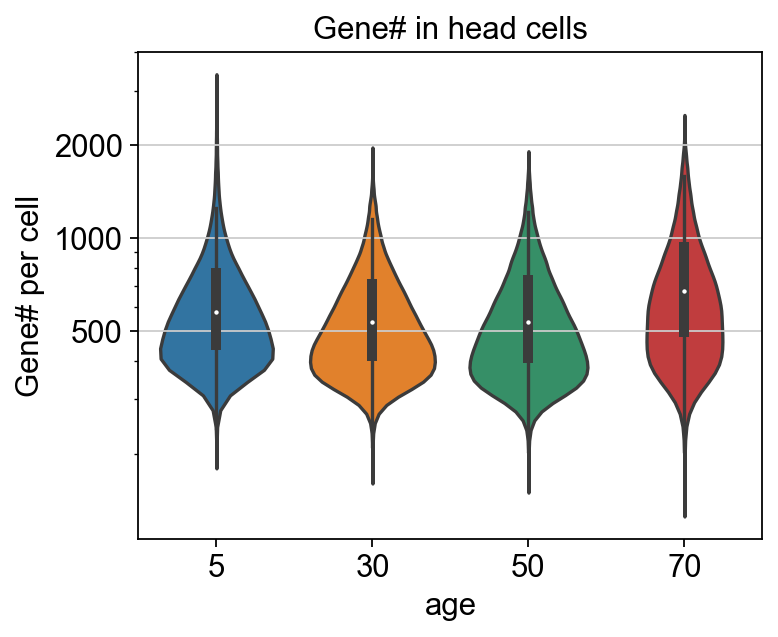

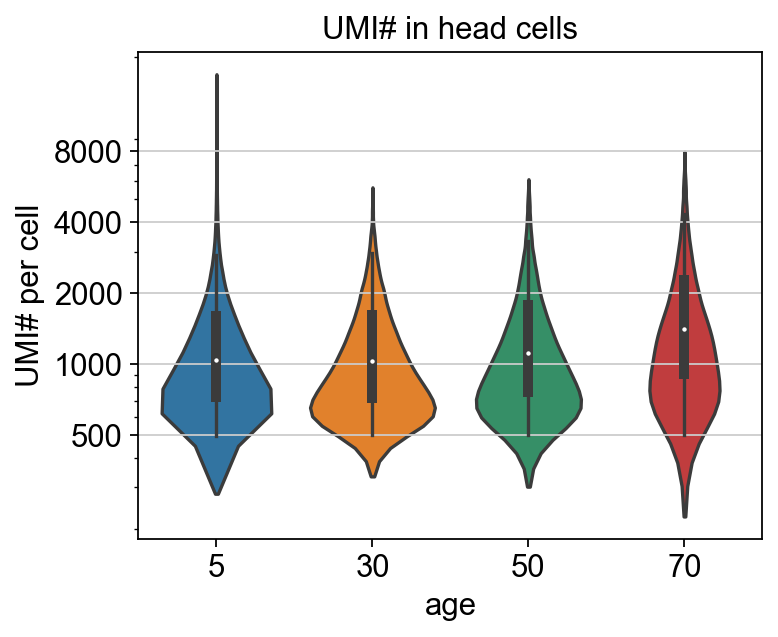

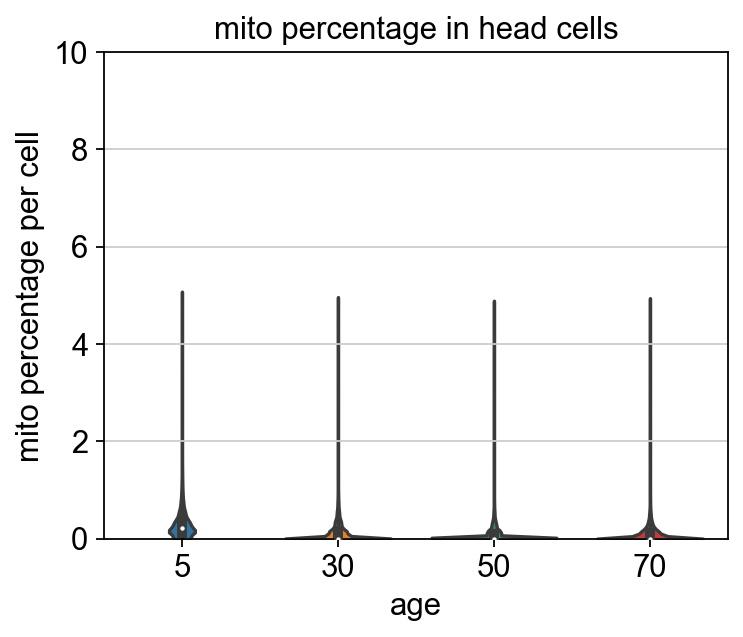

In [41]:
tissue='head'
obs_Df = adata_head.obs

with rc_context({'figure.figsize': (5, 4)}):
    # fig, axs = plt.subplots(1, 3)
    for i, feature in enumerate(['n_genes_by_counts', 'total_counts', 'pct_counts_mt']):
        g=sns.violinplot(data=obs_Df, x='age', y=feature)
        
        if feature in ['n_genes_by_counts', 'total_counts']:
            plt.yscale("log")
            if feature == 'n_genes_by_counts':
                plt.yticks(ticks=[500, 1000, 2000], labels=[500, 1000, 2000])
            else:
                plt.yticks(ticks=[500, 1000, 2000, 4000, 8000], labels=[500, 1000, 2000, 4000, 8000])
        else:
            plt.ylim(0, 10)
        
        plt.ylabel(f'{countName_D[feature]} per cell')
        plt.title(f'{countName_D[feature]} in {tissue} cells')
        # plt.tight_layout()
        
        plt.savefig(f'{figure1PicFolder}/violin_{tissue}_{feature}.pdf', dpi=300)
        plt.savefig(f'{figure1PicFolder}/violin_{tissue}_{feature}.png', dpi=300)
        plt.show()

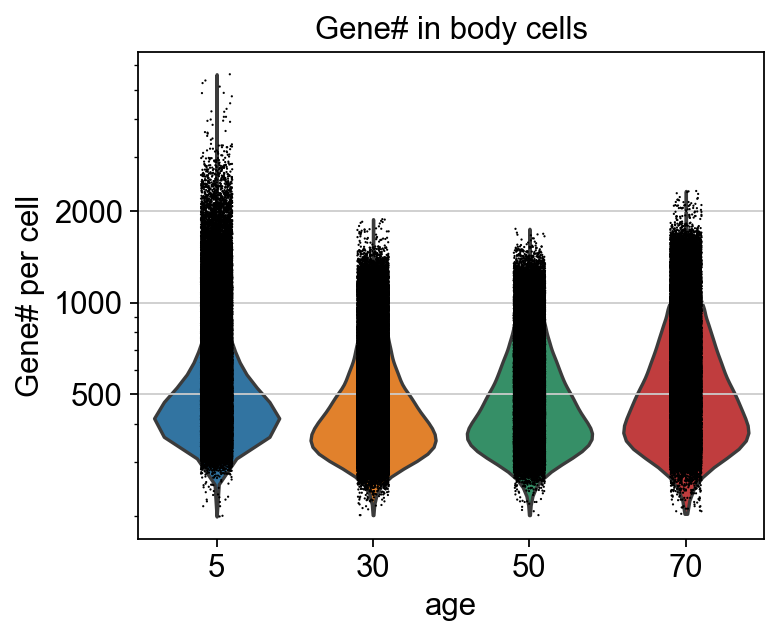

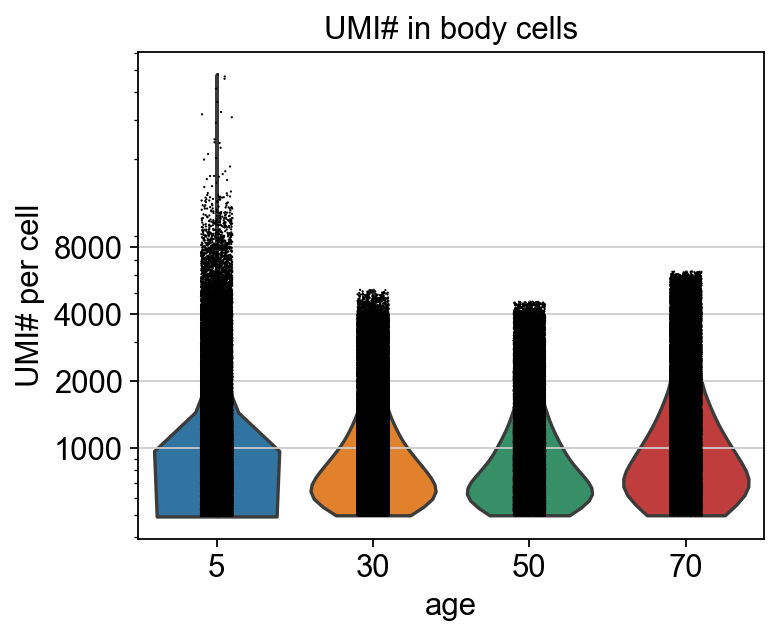

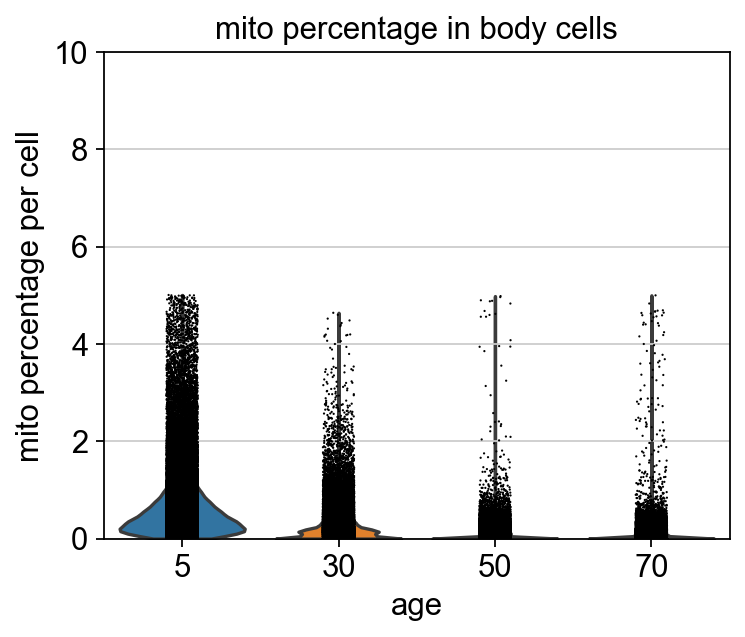

In [35]:
tissue='body'

with rc_context({'figure.figsize': (5, 4)}):
    # fig, axs = plt.subplots(1, 3)
    for i, feature in enumerate(['n_genes_by_counts', 'total_counts', 'pct_counts_mt']):
        sc.pl.violin(adata_body, keys=[feature], groupby='age', show=False)
        
        # if feature == 'total_counts':plt.ylim(0, 15000)
        # if feature == 'n_genes_by_counts':plt.ylim(0, 3500)
        
        if feature in ['n_genes_by_counts', 'total_counts']:
            plt.yscale("log")
            if feature == 'n_genes_by_counts':
                plt.yticks(ticks=[500, 1000, 2000], labels=[500, 1000, 2000])
            else:
                plt.yticks(ticks=[ 1000, 2000, 4000, 8000], labels=[ 1000, 2000, 4000, 8000])
        else:
            plt.ylim(0, 10)
        
        plt.ylabel(f'{countName_D[feature]} per cell')
        plt.title(f'{countName_D[feature]} in {tissue} cells')
        # plt.tight_layout()
        
        plt.savefig(f'{figure1PicFolder}/violin_{tissue}_{feature}.pdf', dpi=300)
        plt.savefig(f'{figure1PicFolder}/violin_{tissue}_{feature}.png', dpi=300)
        plt.show()

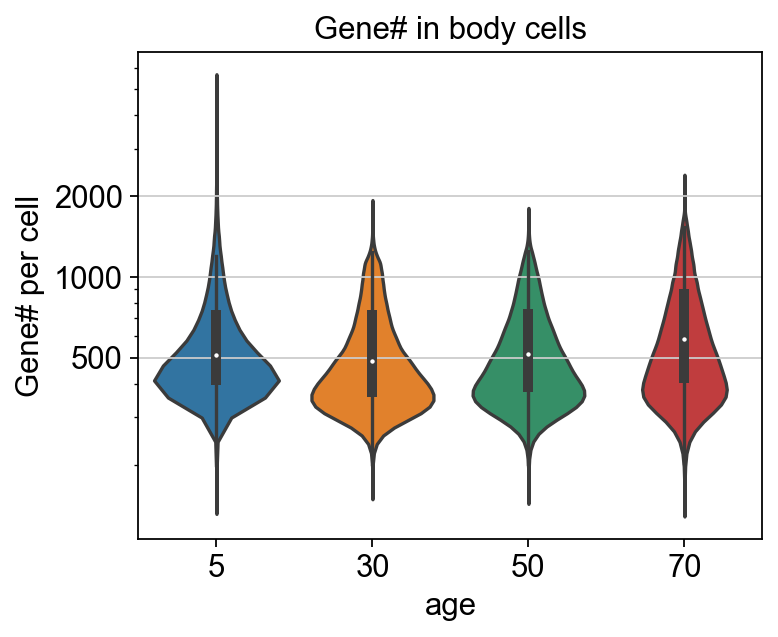

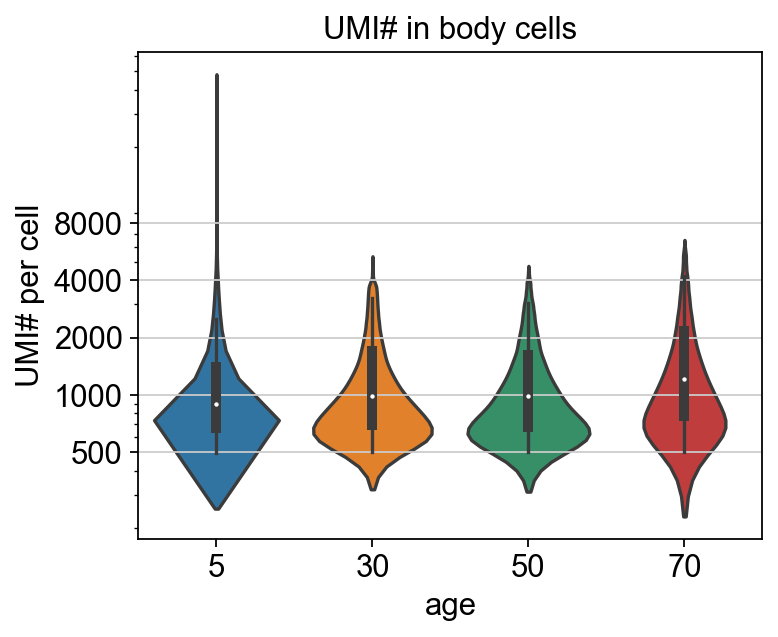

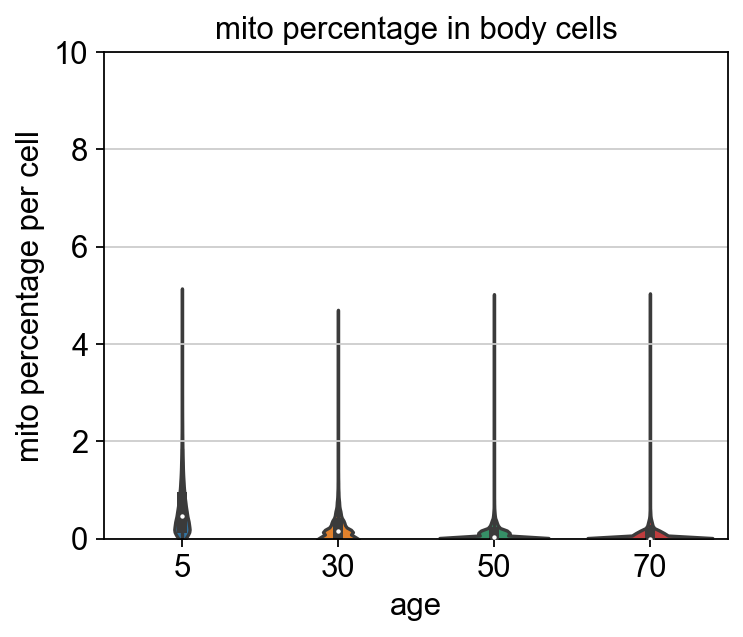

In [44]:
tissue='body'
obs_Df = adata_body.obs

with rc_context({'figure.figsize': (5, 4)}):
    # fig, axs = plt.subplots(1, 3)
    for i, feature in enumerate(['n_genes_by_counts', 'total_counts', 'pct_counts_mt']):
        g=sns.violinplot(data=obs_Df, x='age', y=feature)
        
        if feature in ['n_genes_by_counts', 'total_counts']:
            plt.yscale("log")
            if feature == 'n_genes_by_counts':
                plt.yticks(ticks=[500, 1000, 2000], labels=[500, 1000, 2000])
            else:
                plt.yticks(ticks=[500, 1000, 2000, 4000, 8000], labels=[500, 1000, 2000, 4000, 8000])
        else:
            plt.ylim(0, 10)
        
        plt.ylabel(f'{countName_D[feature]} per cell')
        plt.title(f'{countName_D[feature]} in {tissue} cells')
        # plt.tight_layout()
        
        plt.savefig(f'{figure1PicFolder}/violin_{tissue}_{feature}.pdf', dpi=300)
        plt.savefig(f'{figure1PicFolder}/violin_{tissue}_{feature}.png', dpi=300)
        plt.show()